Abstract 
- Over the time, people have collected the sensory data on quality wine in terms of few attributes. Here, in this assignment we will be using that dataset to train machine learning models and make a fresh predictions on a new set of data, to help people access the quality of wine with the given set of attributes. This project will help the wine industry and wine testers to great extent.

Variable Description                                                  
1) Fixed Acidity - Quantity of non volatile acids in the wine.               
2) Volatile Acidity - Quantity of volatile acids like acetic acid in the wine.                                                                     
3) Citric Acid - Quantity of citric acid in wine, which gives sour taste to wine                                                             
4) Residual Sugar - Amount of sugar left in the wine after the process of fermentation                                                         
5) Chlorides - Quantity of salts in wine                               
6) Free Sulphur dioxide - Amount of free form of SO2, which prevents the oxidation of wine                                                 
7) Total Sulphur dioxide - Total Amount of SO2 - free and bonded in wine.    
8) Density - Density of wine       
9) pH - pH value of wine                          
10) Sulphates - Amount of sulphates in wine used as wine additive           
11) Alcohol - Quantity of alcohol on wine                                   
12) Quality - Output variable between (0 to 10)                                                                                                                                                                                                                                                          

In [1]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (16, 8)})

In [3]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [4]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

3


In [5]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:8746 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.1+12-LTS-39, mixed mode, sharing)
  Starting server from C:\Users\Karan\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Karan\AppData\Local\Temp\tmpvw_ppl2f
  JVM stdout: C:\Users\Karan\AppData\Local\Temp\tmpvw_ppl2f\h2o_Karan_started_from_python.out
  JVM stderr: C:\Users\Karan\AppData\Local\Temp\tmpvw_ppl2f\h2o_Karan_started_from_python.err
  Server is running at http://127.0.0.1:8746
Connecting to H2O server at http://127.0.0.1:8746 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.1.4
H2O_cluster_version_age:    6 months and 5 days !!!
H2O_cluster_name:           H2O_from_python_Karan_i8yaqx
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.938 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:8746
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.0 final
--------------------------  -----------------------------

Exploratory Data Analysis (EDA)

In [6]:
pandas_df = pd.read_csv(
    "https://raw.githubusercontent.com/KaranAgrawal1509/Wine-Quality-Analysis/main/WineQT.csv"
)  # Reading CSV file into Pandas DataFrame

In [7]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
pandas_df.isnull().sum()  # Checking for any null values in the dataset, as we hav no null values - we are good to go.

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [9]:
pandas_df.shape  # Shape of the dataframe - Here, we have 1143 samples of data with 12 predictors and 1 result

(1143, 13)

In [10]:
pandas_df.head()  # Sample of how our data looks

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [11]:
columns = list(pandas_df.columns)
print(columns)  # Name of all predictors and result

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']


In [12]:
pandas_df.describe()  # Statistical description of our dataset

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

<AxesSubplot:>

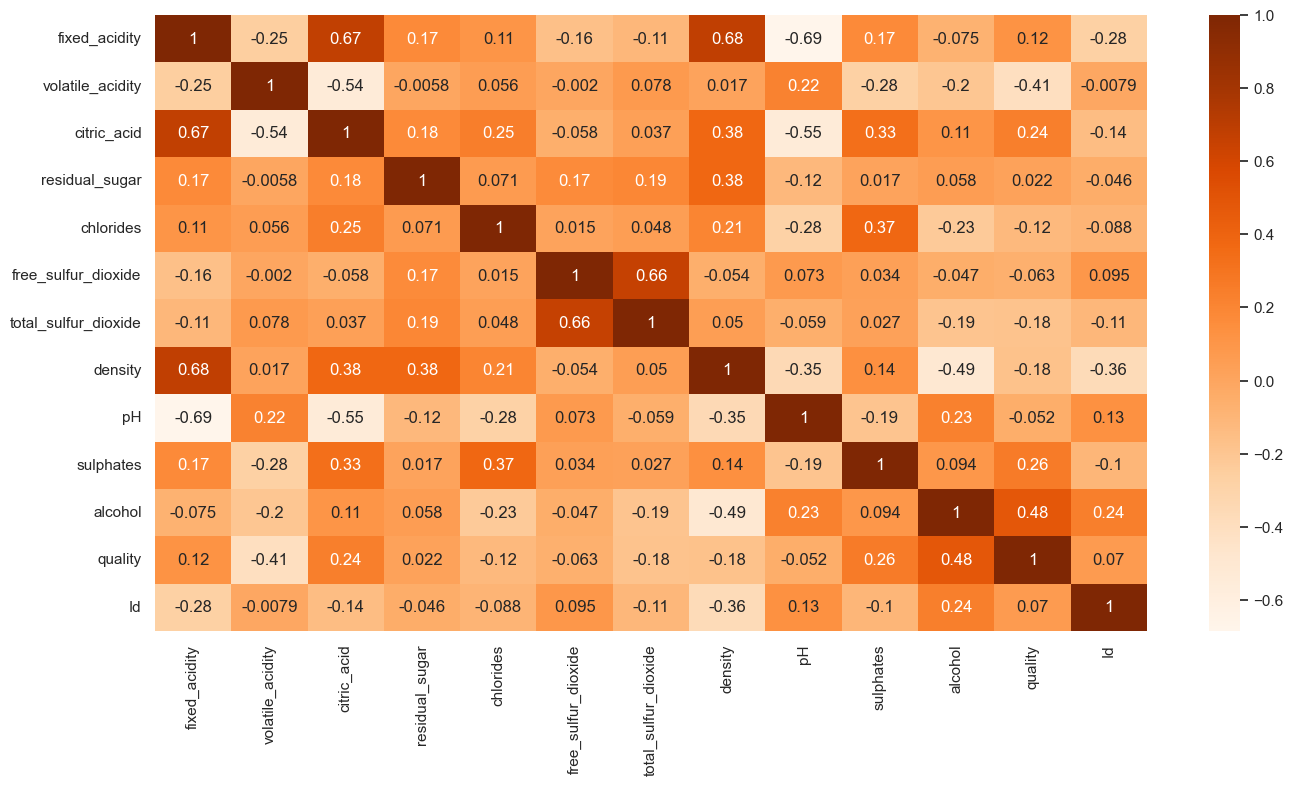

In [13]:
sns.heatmap(
    pandas_df.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes.

# Correlation Analysis

- According to the corelation HeatMap, all independent variables have little to no correlation on each other. Hence, it can be concluded that all the variables are independent of each other.
- Closer the values are to 1 and -1 more co-rrelated two features are positively and negatively. 

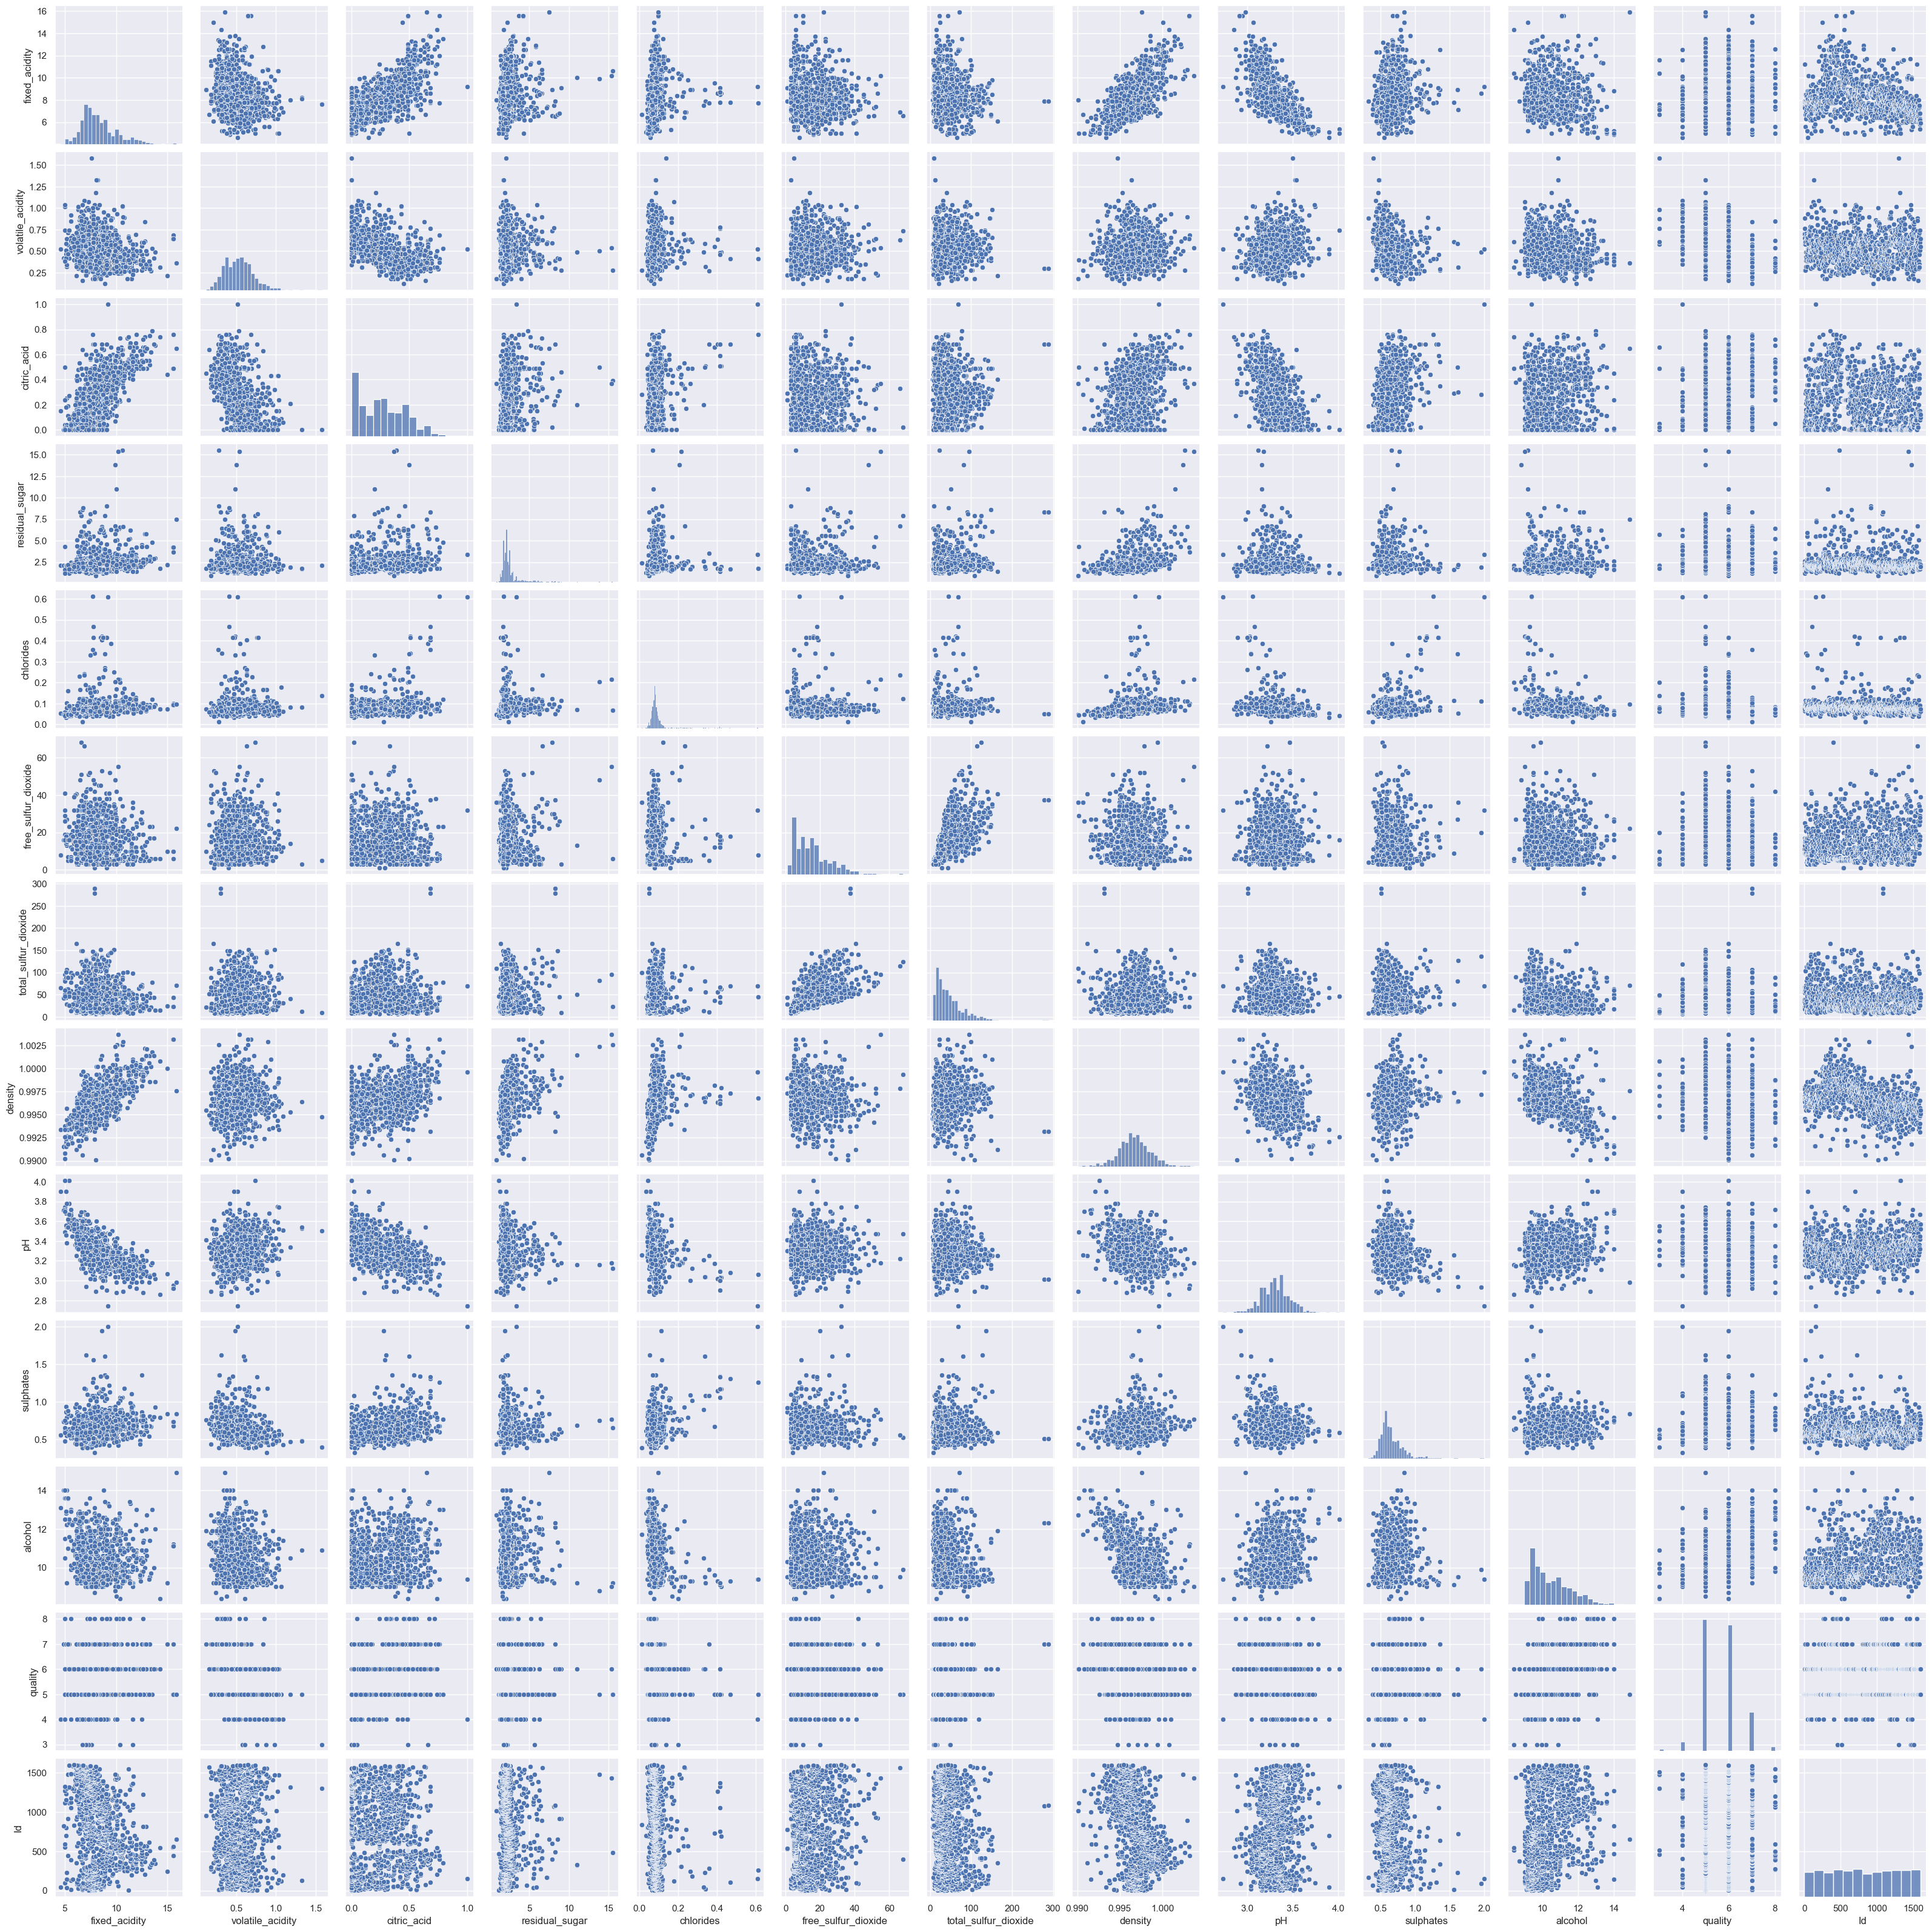

In [14]:
sns.pairplot(
    pandas_df
)  # All attributes are plotted against each other to see the pattern of distribution

array([[<AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>,
        <AxesSubplot:title={'center':'residual_sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'total_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'Id'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

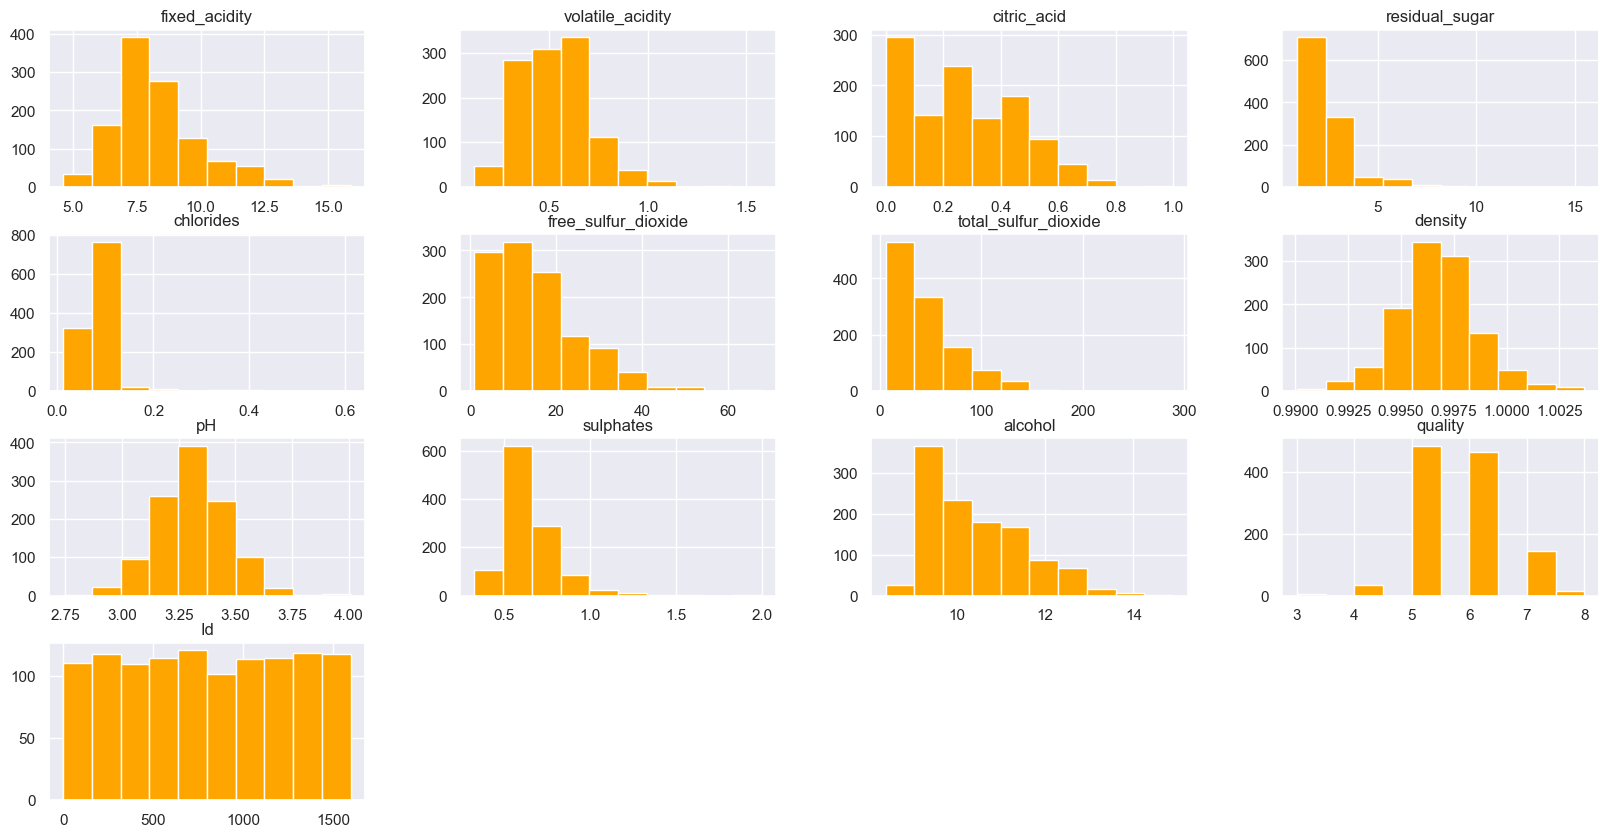

In [15]:
pandas_df.hist(color="orange", figsize=(20, 10))  # Plotted Histogram

In [16]:
df = h2o.H2OFrame(
    pandas_df
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [17]:
df.types  # Datatype of all attributes, here the result ("quality") is int hence it can be solved using the regression. If this problem was supposed to solved using the classification method - this attributes datatype must be converted into enum

{'fixed_acidity': 'real',
 'volatile_acidity': 'real',
 'citric_acid': 'real',
 'residual_sugar': 'real',
 'chlorides': 'real',
 'free_sulfur_dioxide': 'real',
 'total_sulfur_dioxide': 'real',
 'density': 'real',
 'pH': 'real',
 'sulphates': 'real',
 'alcohol': 'real',
 'quality': 'int',
 'Id': 'int'}

In [18]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [19]:
print(df_train.shape)
print(df_test.shape)

(923, 13)
(220, 13)


In [20]:
df_train.head()

fixed_acidity volatile_acidity citric_acid residual_sugar chlorides free_sulfur_dioxide total_sulfur_dioxide density pH sulphates alcohol quality Id 
 
 
 7.4 0.7 0 1.9 0.076 11 34 0.9978 3.51 0.56 9.4 5 0 
 7.8 0.88 0 2.6 0.098 25 67 0.9968 3.2 0.68 9.8 5 1 
 7.8 0.76 0.04 2.3 0.092 15 54 0.997 3.26 0.65 9.8 5 2 
 11.2 0.28 0.56 1.9 0.075 17 60 0.998 3.16 0.58 9.8 6 3 
 7.4 0.7 0 1.9 0.076 11 34 0.9978 3.51 0.56 9.4 5 4 
 7.4 0.66 0 1.8 0.075 13 40 0.9978 3.51 0.56 9.4 5 5 
 7.9 0.6 0.06 1.6 0.069 15 59 0.9964 3.3 0.46 9.4 5 6 
 7.8 0.58 0.02 2 0.073 9 18 0.9968 3.36 0.57 9.5 7 8 
 6.7 0.58 0.08 1.8 0.097 15 65 0.9959 3.28 0.54 9.2 5 10 
 5.6 0.615 0 1.6 0.089 16 59 0.9943 3.58 0.52 9.9 5 12

In [21]:
X = df.columns
print(X)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']


In [22]:
# Set target and predictor variables
y = "quality"
X.remove(y)  # Removing the result frm our predictors data
X.remove("Id")  # Removing ID from the predictor's data, as it is not related
print(X)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [23]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [24]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |
09:42:10.109: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_6_AutoML_1_20230209_94210

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.027478599193239944
RMSE: 0.16576670109898411
MAE: 0.12489486276796352
RMSLE: 0.025939532011966967
R^2: 0.9571251940789849
Mean Residual Deviance: 0.027478599193239944
Null degrees of freedom: 922
Residual degrees of freedom: 904
Null deviance: 591.5536294691259
Residual deviance: 25.36274705536047
AIC: -658.2224764232305

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.3224917393928856
RMSE: 0.5678835614744325
MAE: 0.41977455719577866
RMSLE: 0.08831129781354634
R^2: 0.4968167539995235
Mean Residual Deviance: 0.3224917393928856
Null degrees of freedom:

mean        sd  cv_1_valid  cv_2_valid  \
0                     mae    0.421682  0.011981    0.427360    0.413308   
1  mean_residual_deviance    0.322467  0.028178    0.323408    0.327000   
2                     mse    0.322467  0.028178    0.323408    0.327000   
3           null_deviance  118.404850  6.872473  128.433690  112.749620   
4                      r2    0.496232  0.033536    0.523217    0.467938   
5       residual_deviance   59.505424  4.965501   61.124100   59.841007   
6                    rmse    0.567426  0.024852    0.568690    0.571839   
7                   rmsle    0.088147  0.006269    0.086852    0.088100   

   cv_3_valid  cv_4_valid  cv_5_valid  
0    0.439814    0.417428    0.410502  
1    0.362172    0.316571    0.283182  
2    0.362172    0.316571    0.283182  
3  120.733370  118.827580  111.279990  
4    0.459346    0.494356    0.536303  
5   65.190900   59.831917   51.539196  
6    0.601807    0.562646    0.532149  
7    0.097855    0.087589    0.080337

We can see above that the best model, is slighly overfitting on the dataset as there is a significant difference between the metrics on training and validation dataset

In [25]:
print(
    aml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id rmse mse mae rmsle mean_residual_deviance 
 
 
 StackedEnsemble_AllModels_6_AutoML_1_20230209_94210 0.567884 0.322492 0.419775 0.0883113 0.322492 
 StackedEnsemble_BestOfFamily_6_AutoML_1_20230209_94210 0.567901 0.322512 0.421443 0.0883167 0.322512 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20230209_94210 0.57097 0.326006 0.419461 0.0886909 0.326006 
 StackedEnsemble_AllModels_3_AutoML_1_20230209_94210 0.571389 0.326486 0.419005 0.0887546 0.326486 
 StackedEnsemble_AllModels_4_AutoML_1_20230209_94210 0.571433 0.326535 0.419851 0.0887719 0.326535 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20230209_94210 0.57392 0.329385 0.422983 0.089083 0.329385 
 StackedEnsemble_AllModels_1_AutoML_1_20230209_94210 0.575181 0.330833 0.425524 0.0892396 0.330833 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20230209_94210 0.57583 0.33158 0.425994 0.0893313 0.33158 
 DRF_1_AutoML_1_20230209_94210 0.576405 0.332243 0.431334 0.0895395 0.332243 
 StackedEnsemble_AllModels_2_AutoML_1_20230209_94210 0.576431 0.332273 0.424524 0.0894253 0.332273

In [26]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_AllModels_6_AutoML_1_20230209_94210': 0,
 'StackedEnsemble_BestOfFamily_6_AutoML_1_20230209_94210': 1,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20230209_94210': 2,
 'StackedEnsemble_AllModels_3_AutoML_1_20230209_94210': 3,
 'StackedEnsemble_AllModels_4_AutoML_1_20230209_94210': 4,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20230209_94210': 5,
 'StackedEnsemble_AllModels_1_AutoML_1_20230209_94210': 6,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20230209_94210': 7,
 'DRF_1_AutoML_1_20230209_94210': 8,
 'GLM_1_AutoML_1_20230209_94210': 54}

In [27]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

8


In [28]:
best_model.algo

'drf'

In [29]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

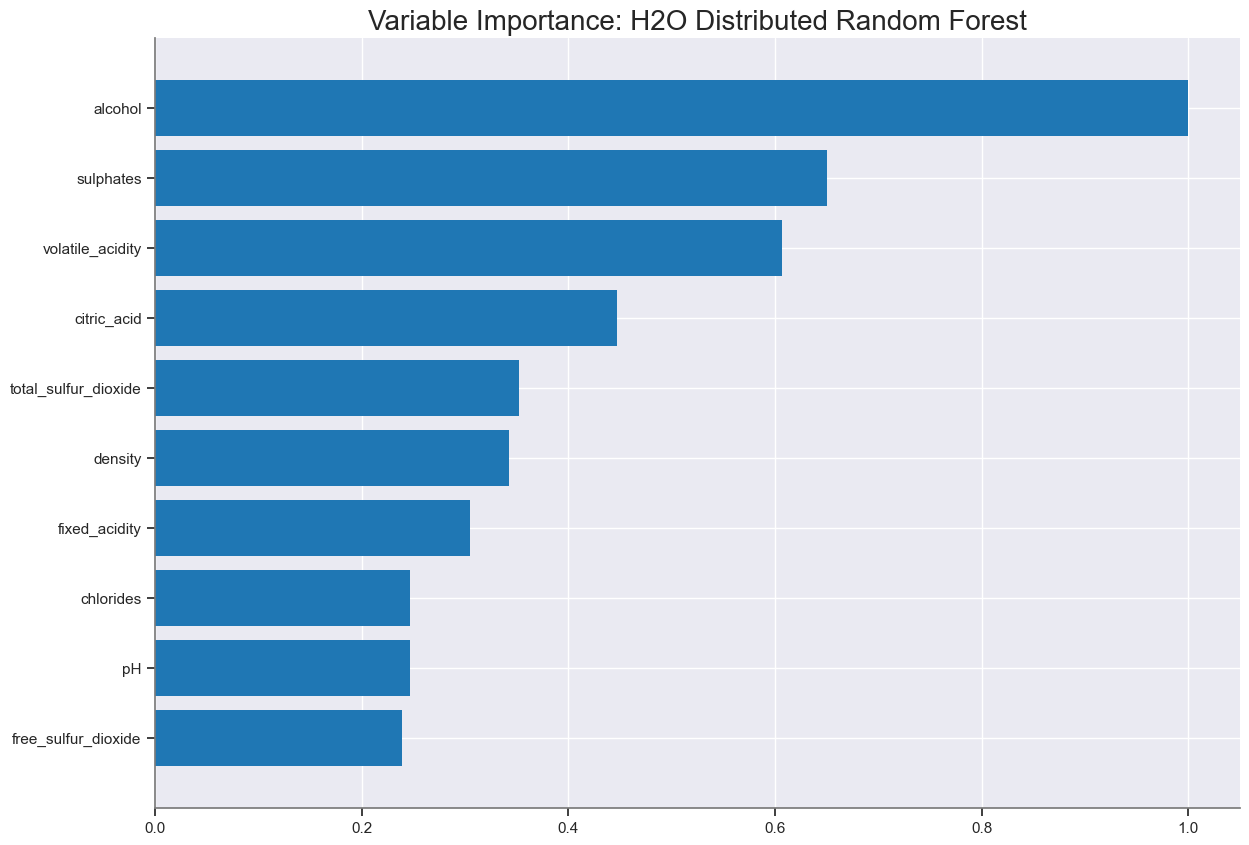

<Figure size 1600x800 with 0 Axes>

In [30]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Karan\AppData\Local\Temp\ipykernel_20024\4076042168.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


54
glm


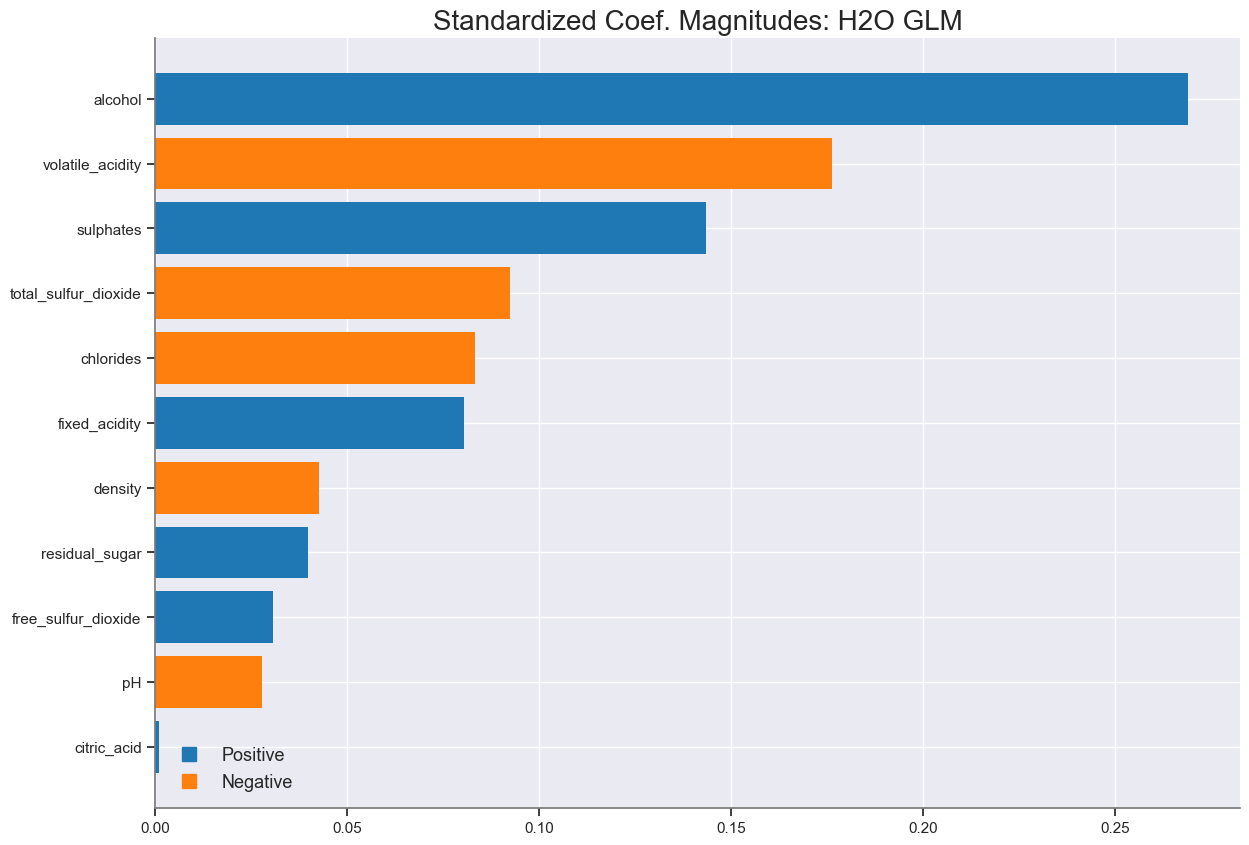

In [31]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [32]:
print(best_model.rmse(train=True))

0.5846592664321808


In [33]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [34]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.4347234390669024,
 'rmse': 0.6593356042766858,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [35]:
predictions = best_model.predict(df_test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [36]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

      predict
0    5.214286
1    5.190476
2    5.500000
3    5.452381
4    5.690476
..        ...
215  6.500000
216  5.333333
217  6.285714
218  5.428571
219  5.333333

[220 rows x 1 columns]


In [37]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

quality
0          7
1          5
2          7
3          6
4          5
..       ...
215        6
216        5
217        6
218        5
219        6

[220 rows x 1 columns]

In [38]:
print(X)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting. 

In [39]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

wine_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
wine_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
wine_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
wine_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [40]:
wine_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1675953699795_30


GLM Model: summary


family      link regularization  number_of_predictors_total  \
0    gaussian  identity           None                          11   

  number_of_active_predictors  number_of_iterations training_frame  
0                          11                     1  py_2_sid_b655



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.3924883595313296
RMSE: 0.6264889141328277
MAE: 0.4873379224094127
RMSLE: 0.09592342705828358
R^2: 0.3876011610772647
Mean Residual Deviance: 0.3924883595313296
Null degrees of freedom: 922
Residual degrees of freedom: 911
Null deviance: 591.5536294691259
Residual deviance: 362.26675584741724
AIC: 1782.126259608572

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.40764509106221186
RMSE: 0.6384709007168705
MAE: 0.4951371439893989
RMSLE: 0.09773224044719703
R^2: 0.3639521417726935
Mean Residual Deviance: 0.40764509106221186
Null degrees of freedom: 922
Residual degrees of freedom: 911
Null deviance: 594.7155824927605
Residual deviance: 376.2564190504215
AIC: 1817.0987678745912

Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                     mae    0.493639   0.021815    0.477000    0.506122   
1  mean_residual_deviance    0.404972   0.033029    0.364272    0.395083   
2                     mse    0.404972   0.033029    0.364272    0.395083   
3           null_deviance  118.943115  25.107230   98.451385  100.341255   
4                      r2    0.353166   0.034392    0.347782    0.314801   
5       residual_deviance   75.251280  14.533195   61.926210   68.744410   
6                    rmse    0.635957   0.025769    0.603549    0.628556   
7                   rmsle    0.097202   0.005632    0.089903    0.095596   

   cv_3_valid  cv_4_valid  cv_5_valid  
0    0.525720    0.484765    0.474586  
1    0.455685    0.409238    0.400584  
2    0.455685    0.409238    0.400584  
3  157.929720  129.849980  108.143250  
4    0.370484    0.402307    0.330459  
5   99.339420   77.345900   68.900490  
6    0.675045    0.639717    0.632917  
7    0.105298    0.096005    0.099208


Scoring History: 


timestamp    duration  iterations negative_log_likelihood  \
0    2023-02-09 09:45:59   0.000 sec           0              591.553629   
1    2023-02-09 09:45:59   0.017 sec           1                           

  objective training_rmse training_deviance training_mae training_r2  
0  0.640903                                                           
1                0.626489          0.392488     0.487338    0.387601


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0                alcohol             0.301802           1.000000    0.278988
1       volatile_acidity             0.194203           0.643480    0.179523
2              sulphates             0.151859           0.503175    0.140380
3   total_sulfur_dioxide             0.097290           0.322364    0.089936
4              chlorides             0.084884           0.281256    0.078467
5          fixed_acidity             0.081254           0.269230    0.075112
6                     pH             0.043250           0.143306    0.039981
7    free_sulfur_dioxide             0.038907           0.128916    0.035966
8         residual_sugar             0.035388           0.117257    0.032713
9            citric_acid             0.029630           0.098178    0.027391
10               density             0.023305           0.077219    0.021543

# Ridge Regularization

In [41]:
wine_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1675953699795_31


GLM Model: summary


family      link               regularization  \
0    gaussian  identity  Ridge ( lambda = 3.906E-4 )   

   number_of_predictors_total number_of_active_predictors  \
0                          11                          11   

   number_of_iterations training_frame  
0                     1  py_2_sid_b655



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.3924884002095902
RMSE: 0.6264889465980946
MAE: 0.4873513946101711
RMSLE: 0.09592379641330065
R^2: 0.3876010976070523
Mean Residual Deviance: 0.3924884002095902
Null degrees of freedom: 922
Residual degrees of freedom: 911
Null deviance: 591.5536294691259
Residual deviance: 362.26679339345174
AIC: 1782.1263552700907

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.40503415617711663
RMSE: 0.6364229381292889
MAE: 0.4922381434171784
RMSLE: 0.09741455207392632
R^2: 0.3680259784949965
Mean Residual Deviance: 0.40503415617711663
Null degrees of freedom: 922
Residual degrees of freedom: 911
Null deviance: 593.1481176576141
Residual deviance: 373.84652615147866
AIC: 1811.168011801698

Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                     mae    0.493145   0.043644    0.484610    0.465454   
1  mean_residual_deviance    0.406642   0.078601    0.384402    0.358594   
2                     mse    0.406642   0.078601    0.384402    0.358594   
3           null_deviance  118.629620  12.357396  106.802490  109.346370   
4                      r2    0.367809   0.055396    0.358743    0.391649   
5       residual_deviance   74.769300  12.870746   68.423546   66.339806   
6                    rmse    0.635334   0.061158    0.620002    0.598827   
7                   rmsle    0.097243   0.009570    0.096893    0.091427   

   cv_3_valid  cv_4_valid  cv_5_valid  
0    0.556286    0.444827    0.514547  
1    0.514269    0.318587    0.457357  
2    0.514269    0.318587    0.457357  
3  132.074750  113.118500  131.806000  
4    0.290254    0.441855    0.356545  
5   93.082600   62.761547   83.239020  
6    0.717125    0.564435    0.676282  
7    0.111658    0.086390    0.099849


Scoring History: 


timestamp    duration  iterations negative_log_likelihood  \
0    2023-02-09 09:45:59   0.000 sec           0              591.553629   
1    2023-02-09 09:45:59   0.003 sec           1                           

  objective training_rmse training_deviance training_mae training_r2  
0  0.640903                                                           
1                0.626489          0.392488     0.487351    0.387601


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0                alcohol             0.301560           1.000000    0.278887
1       volatile_acidity             0.194085           0.643604    0.179493
2              sulphates             0.151829           0.503480    0.140414
3   total_sulfur_dioxide             0.097269           0.322553    0.089956
4              chlorides             0.084884           0.281482    0.078502
5          fixed_acidity             0.081321           0.269668    0.075207
6                     pH             0.043111           0.142959    0.039869
7    free_sulfur_dioxide             0.038861           0.128867    0.035939
8         residual_sugar             0.035446           0.117542    0.032781
9            citric_acid             0.029425           0.097576    0.027213
10               density             0.023506           0.077947    0.021738

# Lasso Regularization

In [42]:
wine_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1675953699795_32


GLM Model: summary


family      link              regularization  \
0    gaussian  identity  Lasso (lambda = 3.906E-4 )   

   number_of_predictors_total number_of_active_predictors  \
0                          11                          11   

   number_of_iterations training_frame  
0                     1  py_2_sid_b655



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.39249271268649916
RMSE: 0.6264923883707599
MAE: 0.4874534125210252
RMSLE: 0.0959242550340343
R^2: 0.38759436885755494
Mean Residual Deviance: 0.39249271268649916
Null degrees of freedom: 922
Residual degrees of freedom: 911
Null deviance: 591.5536294691259
Residual deviance: 362.27077380963874
AIC: 1782.1364967018312

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.41193997027192747
RMSE: 0.6418254983030258
MAE: 0.4994040142674486
RMSLE: 0.09814606081587215
R^2: 0.35725084993187584
Mean Residual Deviance: 0.41193997027192747
Null degrees of freedom: 922
Residual degrees of freedom: 911
Null deviance: 593.4219888746163
Residual deviance: 380.2205925609891
AIC: 1826.7724673713237

Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                     mae    0.498994   0.020746    0.489132    0.507081   
1  mean_residual_deviance    0.412034   0.015950    0.407170    0.401557   
2                     mse    0.412034   0.015950    0.407170    0.401557   
3           null_deviance  118.684395  20.253057  147.253950  128.736240   
4                      r2    0.345902   0.064319    0.438958    0.381672   
5       residual_deviance   76.044120   6.145670   81.026920   79.508220   
6                    rmse    0.641803   0.012408    0.638099    0.633685   
7                   rmsle    0.098038   0.003596    0.098902    0.095958   

   cv_3_valid  cv_4_valid  cv_5_valid  
0    0.513151    0.518119    0.467486  
1    0.430692    0.426663    0.394086  
2    0.430692    0.426663    0.394086  
3  112.646250  111.229996   93.555560  
4    0.328719    0.283698    0.296462  
5   74.940414   78.932600   65.812440  
6    0.656271    0.653194    0.627763  
7    0.099989    0.102284    0.093056


Scoring History: 


timestamp    duration  iterations negative_log_likelihood  \
0    2023-02-09 09:45:59   0.000 sec           0              591.553629   
1    2023-02-09 09:45:59   0.003 sec           1                           

  objective training_rmse training_deviance training_mae training_r2  
0  0.640903                                                           
1                0.626492          0.392493     0.487453    0.387594


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0                alcohol             0.302836           1.000000    0.282837
1       volatile_acidity             0.193641           0.639426    0.180853
2              sulphates             0.150906           0.498309    0.140940
3   total_sulfur_dioxide             0.096497           0.318643    0.090124
4              chlorides             0.084646           0.279511    0.079056
5          fixed_acidity             0.078183           0.258170    0.073020
6                     pH             0.043529           0.143737    0.040654
7    free_sulfur_dioxide             0.038027           0.125568    0.035515
8         residual_sugar             0.034099           0.112600    0.031847
9            citric_acid             0.027666           0.091357    0.025839
10               density             0.020679           0.068283    0.019313

# Which Regularization Method Helps ?
Here, we can observe that after applying the ridge regularization, there is a slight improvement in the evaluation metrics on the cross validation data, hence it can be concluded that Ridge regularization helps us avoid the overfitting of model and improvements of metrics on the validation dataset.

In [43]:
lambda_search = wine_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [44]:
lambda_search

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1675953699795_33


GLM Model: summary


family      link                                 regularization  \
0    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.003228 )   

                                                           lambda_search  \
0  nlambda = 100, lambda.max = 0.7812, lambda.min = 0.003228, lambda....   

   number_of_predictors_total number_of_active_predictors  \
0                          11                          11   

   number_of_iterations training_frame  
0                    60  py_2_sid_b655



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.39256893561870326
RMSE: 0.6265532185047837
MAE: 0.48790007686368553
RMSLE: 0.0959355242932446
R^2: 0.3874754383617899
Mean Residual Deviance: 0.39256893561870326
Null degrees of freedom: 922
Residual degrees of freedom: 911
Null deviance: 591.5536294691259
Residual deviance: 362.3411275760631
AIC: 1782.3157278916299

Scoring History: 


timestamp    duration  iteration lambda  predictors  \
0     2023-02-09 09:46:00   0.000 sec          1  .78E0           1   
1     2023-02-09 09:46:00   0.001 sec          2  .71E0           2   
2     2023-02-09 09:46:00   0.002 sec          3  .65E0           2   
3     2023-02-09 09:46:00   0.002 sec          4  .59E0           3   
4     2023-02-09 09:46:00   0.003 sec          5  .54E0           3   
5     2023-02-09 09:46:00   0.003 sec          6  .49E0           3   
6     2023-02-09 09:46:00   0.003 sec          7  .45E0           3   
7     2023-02-09 09:46:00   0.005 sec          8  .41E0           3   
8     2023-02-09 09:46:00   0.005 sec          9  .37E0           3   
9     2023-02-09 09:46:00   0.006 sec         10  .34E0           3   
10    2023-02-09 09:46:00   0.007 sec         11  .31E0           4   
11    2023-02-09 09:46:00   0.008 sec         12  .28E0           4   
12    2023-02-09 09:46:00   0.009 sec         13  .26E0           4   
13    2023-02-09 09:46:00   0.010 sec         14  .23E0           4   
14    2023-02-09 09:46:00   0.011 sec         15  .21E0           4   
15    2023-02-09 09:46:00   0.011 sec         16  .19E0           5   
16    2023-02-09 09:46:00   0.011 sec         17  .18E0           6   
17    2023-02-09 09:46:00   0.013 sec         18  .16E0           6   
18    2023-02-09 09:46:00   0.015 sec         19  .15E0           6   
19    2023-02-09 09:46:00   0.015 sec         20  .13E0           6   

    deviance_train  alpha  iterations training_rmse training_deviance  \
0         0.640903    0.5         NaN                                   
1         0.621548    0.5         NaN                                   
2         0.604256    0.5         NaN                                   
3         0.581004    0.5         NaN                                   
4         0.558871    0.5         NaN                                   
5         0.539532    0.5         NaN                                   
6         0.522698    0.5         NaN                                   
7         0.508096    0.5         NaN                                   
8         0.495471    0.5         NaN                                   
9         0.484591    0.5         NaN                                   
10        0.473557    0.5         NaN                                   
11        0.463828    0.5         NaN                                   
12        0.455540    0.5         NaN                                   
13        0.448494    0.5         NaN                                   
14        0.442513    0.5         NaN                                   
15        0.436491    0.5         NaN                                   
16        0.431130    0.5         NaN                                   
17        0.426166    0.5         NaN                                   
18        0.421987    0.5         NaN                                   
19        0.418469    0.5         NaN                                   

   training_mae training_r2  
0                            
1                            
2                            
3                            
4                            
5                            
6                            
7                            
8                            
9                            
10                           
11                           
12                           
13                           
14                           
15                           
16                           
17                           
18                           
19


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0                alcohol             0.305159           1.000000    0.295038
1       volatile_acidity             0.191422           0.627286    0.185073
2              sulphates             0.147816           0.484389    0.142913
3   total_sulfur_dioxide             0.093970           0.307938    0.090854
4              chlorides             0.083925           0.275021    0.081142
5          fixed_acidity             0.068699           0.225125    0.066421
6                     pH             0.043985           0.144138    0.042526
7    free_sulfur_dioxide             0.035130           0.115121    0.033965
8         residual_sugar             0.030249           0.099126    0.029246
9            citric_acid             0.020797           0.068152    0.020107
10               density             0.013151           0.043095    0.012715

Here we can observe that regularization helps a bit in reducing the overfitting of our GLM model. 

In [45]:
coeff_table = wine_glm._model_json["output"]["coefficients_table"]

In [46]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

names  coefficients  std_error   z_value       p_value  \
0              Intercept     16.030074  27.135979  0.590731  5.548469e-01   
1          fixed_acidity      0.048205   0.032572  1.479962  1.392291e-01   
2       volatile_acidity     -1.057246   0.153007 -6.909790  9.112026e-12   
3            citric_acid     -0.151326   0.187825 -0.805674  4.206409e-01   
4         residual_sugar      0.027445   0.021382  1.283544  1.996281e-01   
5              chlorides     -1.741830   0.532773 -3.269367  1.118277e-03   
6    free_sulfur_dioxide      0.003772   0.002778  1.357558  1.749400e-01   
7   total_sulfur_dioxide     -0.003074   0.000949 -3.238402  1.245482e-03   
8                density    -12.654722  27.686374 -0.457074  6.477268e-01   
9                     pH     -0.280365   0.246597 -1.136935  2.558644e-01   
10             sulphates      0.914978   0.151840  6.025950  2.438373e-09   
11               alcohol      0.281921   0.034705  8.123425  1.467557e-15   

    standardized_coefficients  
0                    5.665222  
1                    0.081254  
2                   -0.194203  
3                   -0.029630  
4                    0.035388  
5                   -0.084884  
6                    0.038907  
7                   -0.097290  
8                   -0.023305  
9                   -0.043250  
10                   0.151859  
11                   0.301802

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id rmse mse mae rmsle mean_residual_deviance training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_AllModels_6_AutoML_1_20230209_94210 0.567884 0.322492 0.419775 0.0883113 0.322492 499 0.089279 StackedEnsemble 
 StackedEnsemble_BestOfFamily_6_AutoML_1_20230209_94210 0.567901 0.322512 0.421443 0.0883167 0.322512 253 0.02594 StackedEnsemble 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20230209_94210 0.57097 0.326006 0.419461 0.0886909 0.326006 149 0.025005 StackedEnsemble 
 StackedEnsemble_AllModels_3_AutoML_1_20230209_94210 0.571389 0.326486 0.419005 0.0887546 0.326486 176 0.046632 StackedEnsemble 
 StackedEnsemble_AllModels_4_AutoML_1_20230209_94210 0.571433 0.326535 0.419851 0.0887719 0.326535 148 0.047718 StackedEnsemble 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20230209_94210 0.57392 0.329385 0.422983 0.089083 0.329385 148 0.028373 StackedEnsemble 
 StackedEnsemble_AllModels_1_AutoML_1_20230209_94210 0.575181 0.330833 0.425524 0.0892396 0.330833 136 0.020054 StackedEnsemble 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20230209_94210 0.57583 0.33158 0.425994 0.0893313 0.33158 155 0.029193 StackedEnsemble 
 DRF_1_AutoML_1_20230209_94210 0.576405 0.332243 0.431334 0.0895395 0.332243 519 0.014134 DRF 
 StackedEnsemble_AllModels_2_AutoML_1_20230209_94210 0.576431 0.332273 0.424524 0.0894253 0.332273 132 0.023509 StackedEnsemble 
 XRT_1_AutoML_1_20230209_94210 0.577474 0.333476 0.434017 0.089854 0.333476 266 0.019795 DRF 
 GBM_grid_1_AutoML_1_20230209_94210_model_13 0.581655 0.338322 0.427613 0.0905195 0.338322 265 0.020522 GBM 
 GBM_grid_1_AutoML_1_20230209_94210_model_15 0.583736 0.340748 0.434479 0.0909061 0.340748 196 0.02777 GBM 
 GBM_grid_1_AutoML_1_20230209_94210_model_12 0.5841 0.341173 0.436496 0.0903393 0.341173 149 0.012684 GBM 
 GBM_5_AutoML_1_20230209_94210 0.585387 0.342678 0.44338 0.0907804 0.342678 250 0.00907 GBM 
 GBM_4_AutoML_1_20230209_94210 0.586226 0.343661 0.449942 0.0909283 0.343661 210 0.009938 GBM 
 StackedEnsemble_BestOfFamily_5_AutoML_1_20230209_94210 0.586376 0.343837 0.427241 0.0906965 0.343837 477 0.035146 StackedEnsemble 
 StackedEnsemble_AllModels_5_AutoML_1_20230209_94210 0.586942 0.344501 0.439891 0.091026 0.344501 1555 0.173424 StackedEnsemble 
 GBM_grid_1_AutoML_1_20230209_94210_model_21 0.588143 0.345912 0.430367 0.0913212 0.345912 219 0.015072 GBM 
 GBM_grid_1_AutoML_1_20230209_94210_model_23 0.588203 0.345982 0.446855 0.0911935 0.345982 157 0.010143 GBM

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

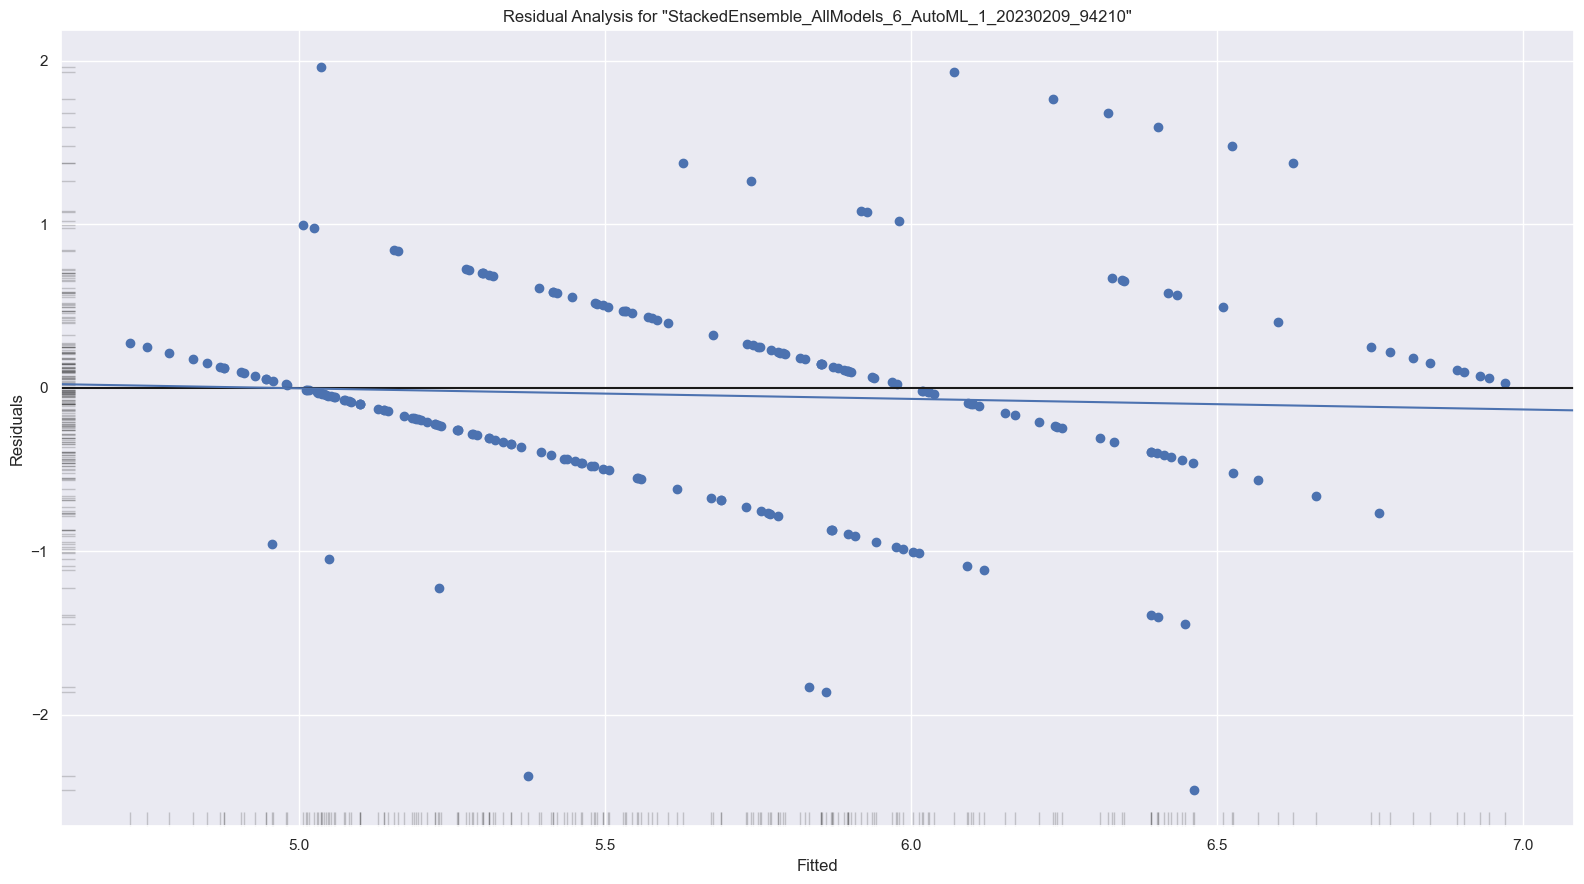

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

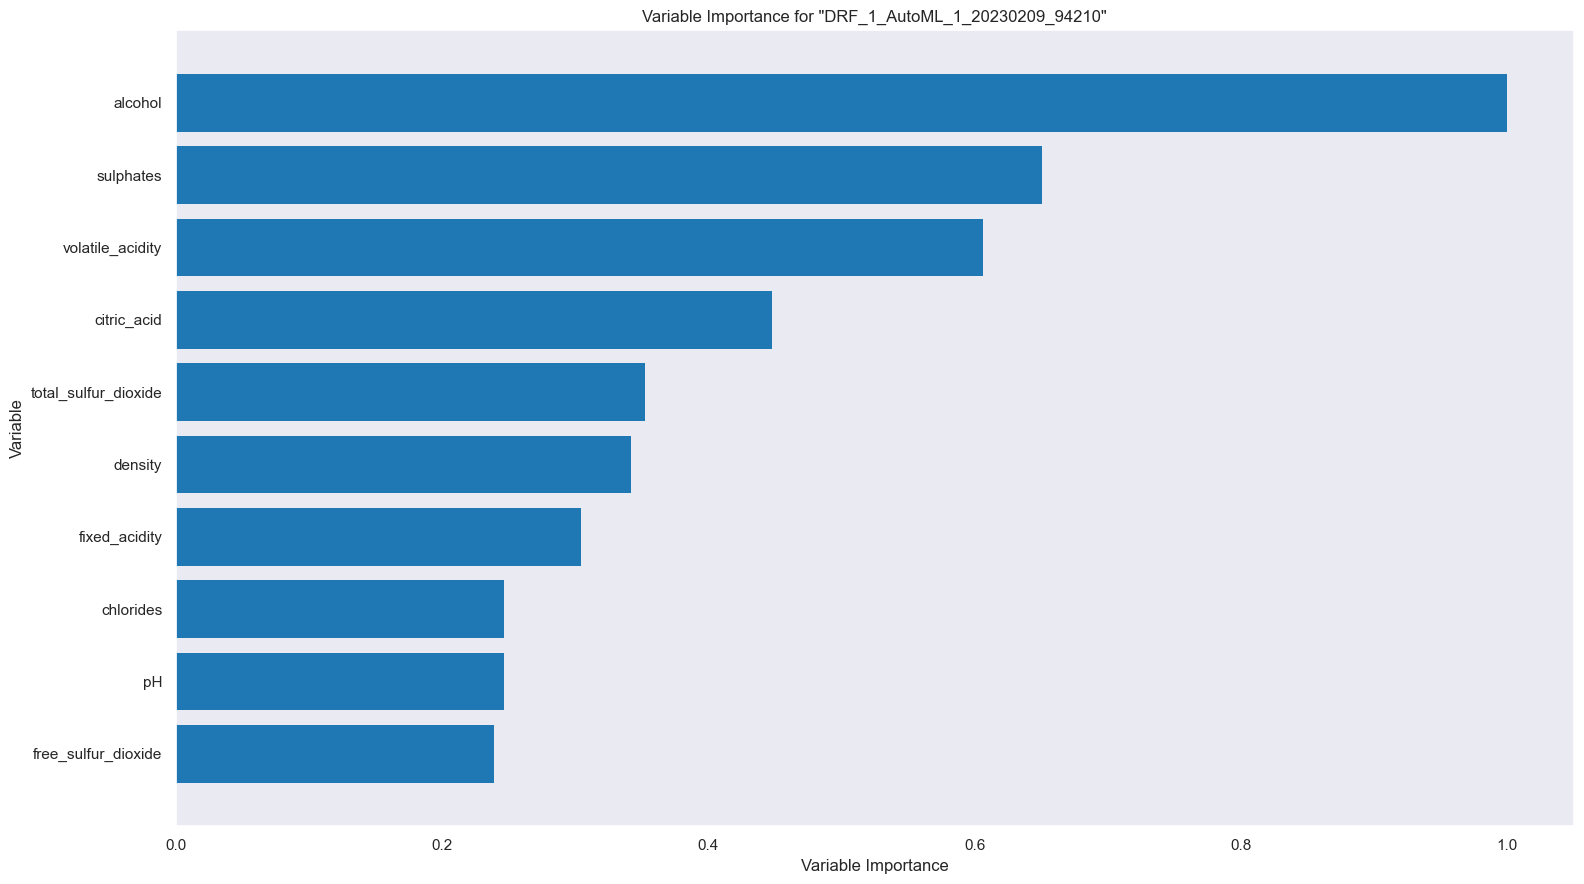

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

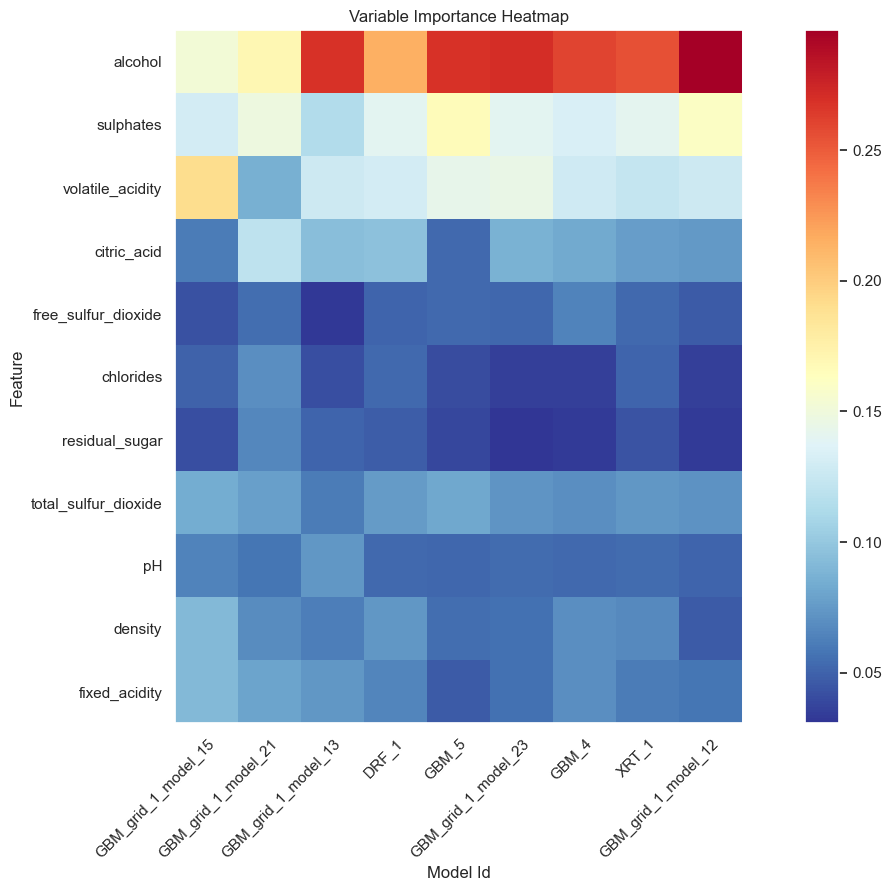

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

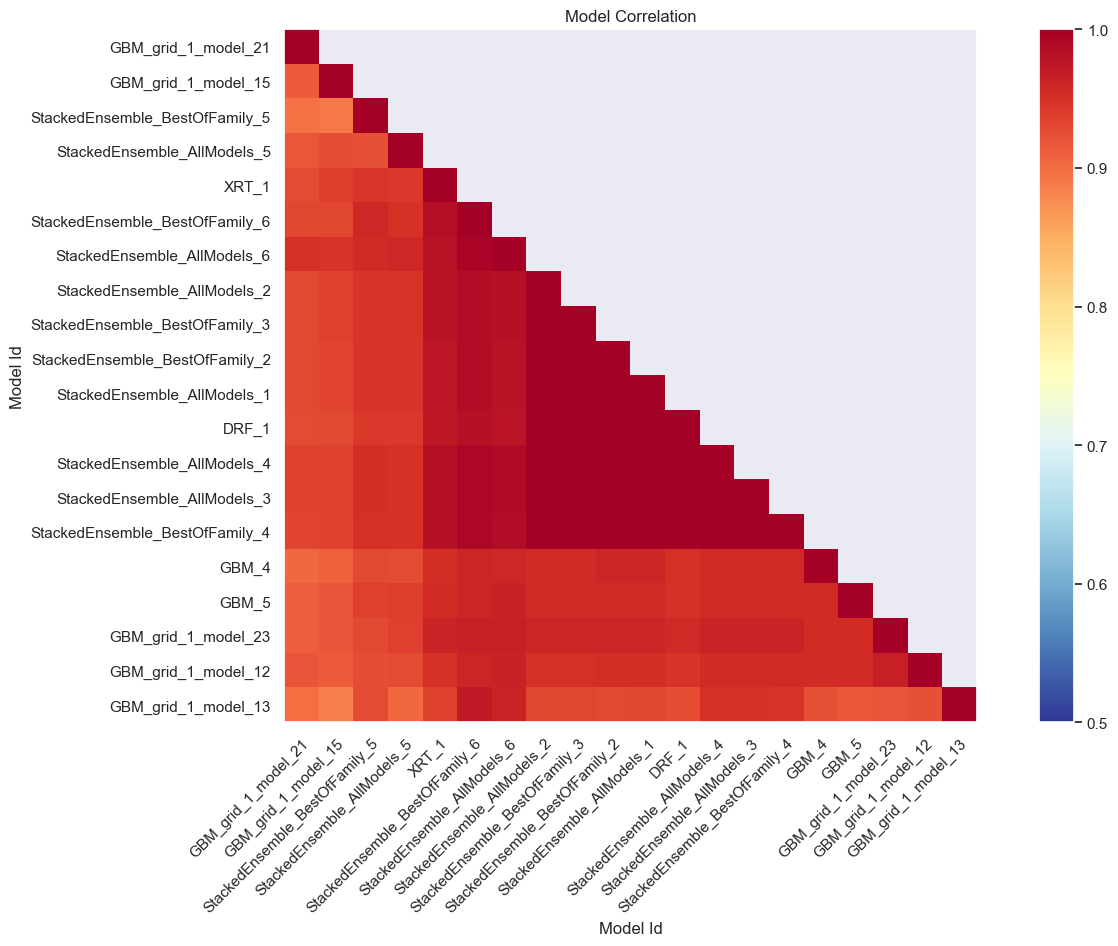

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

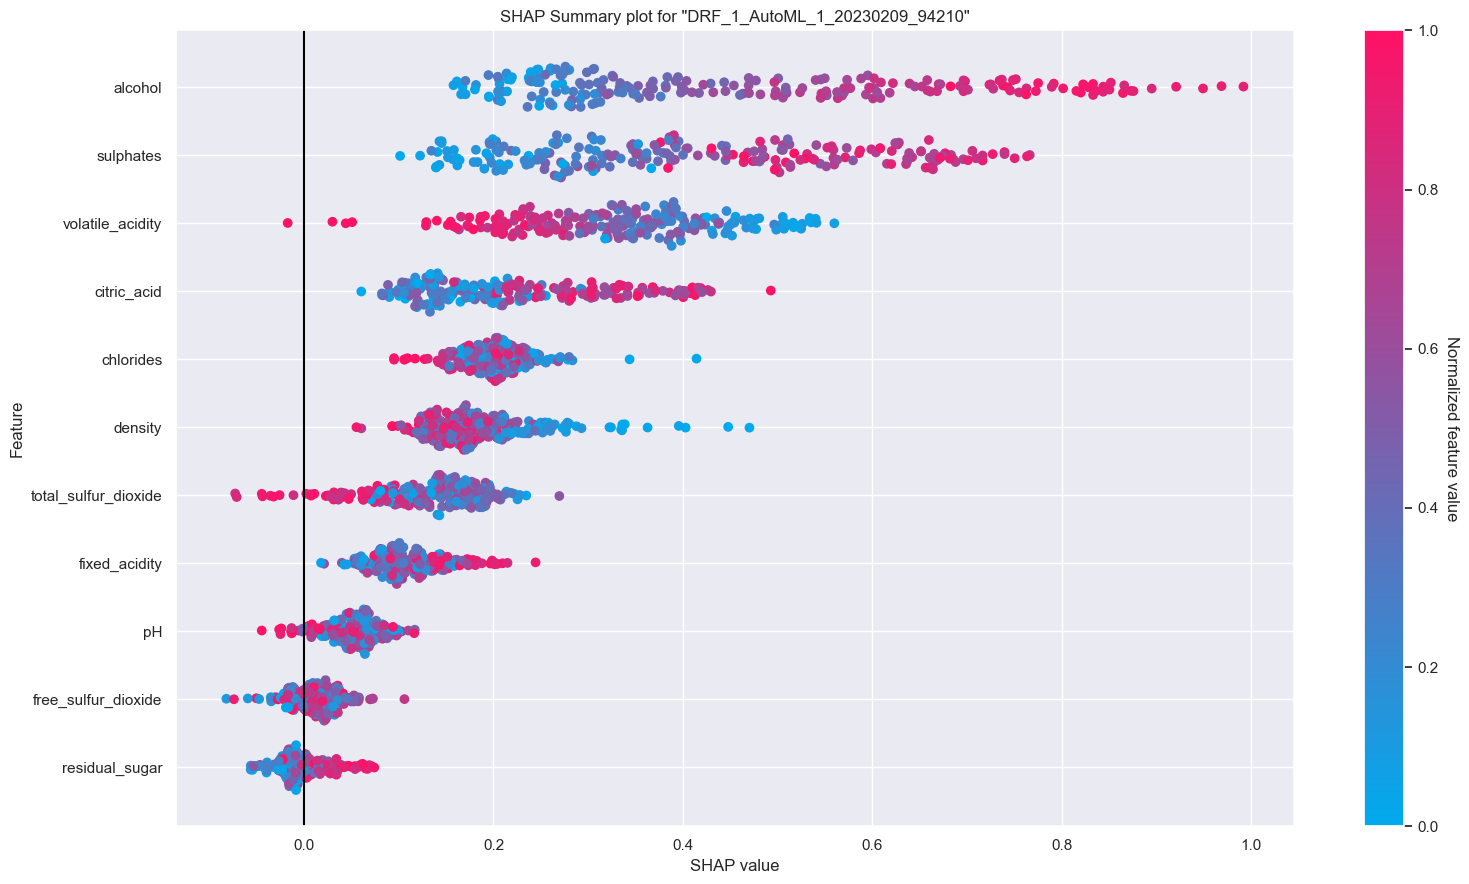

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

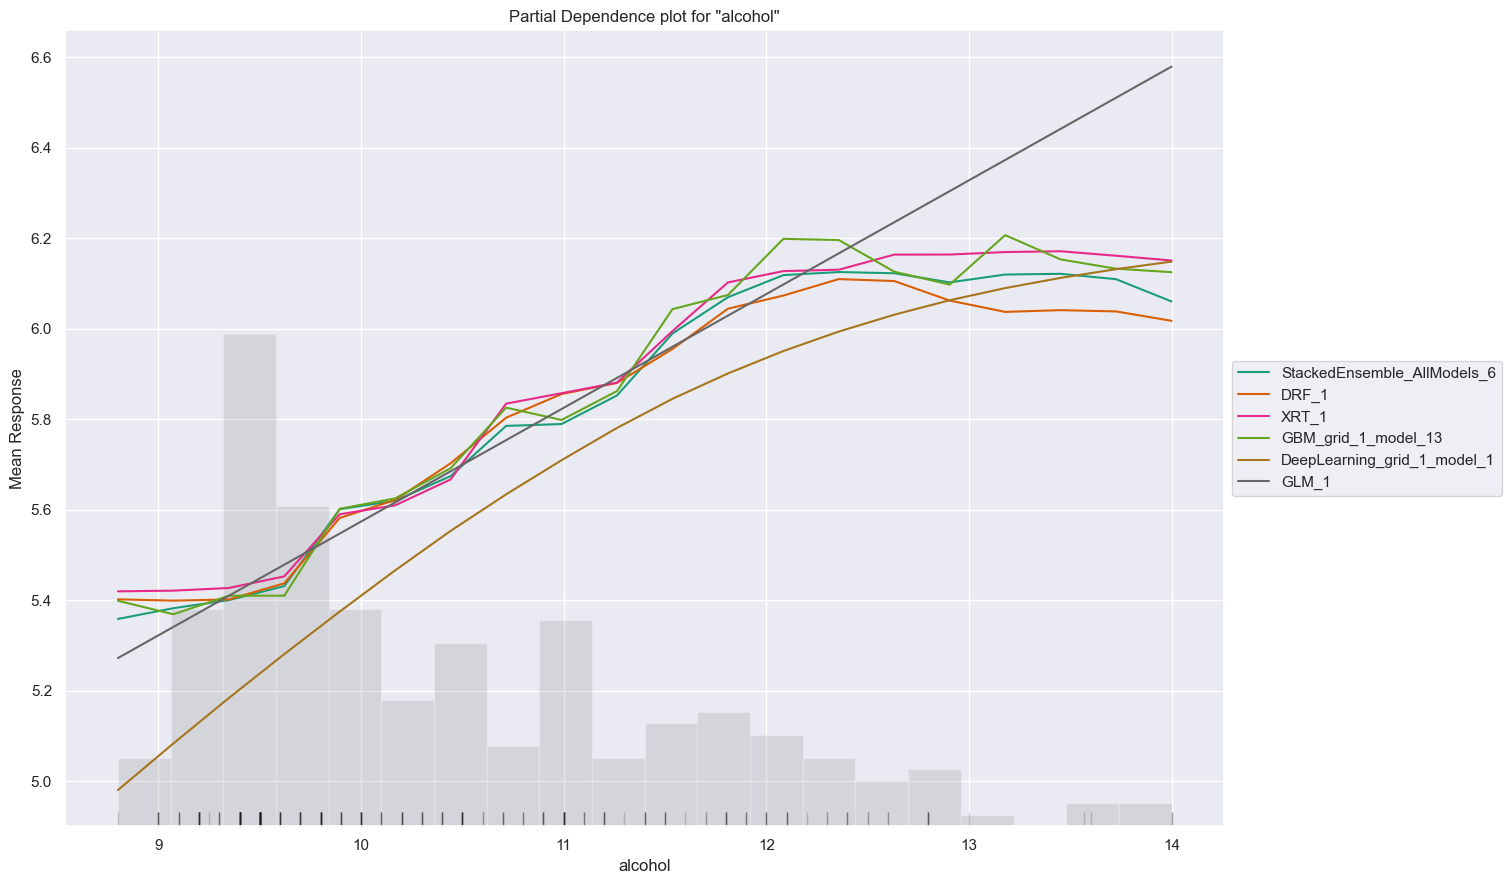

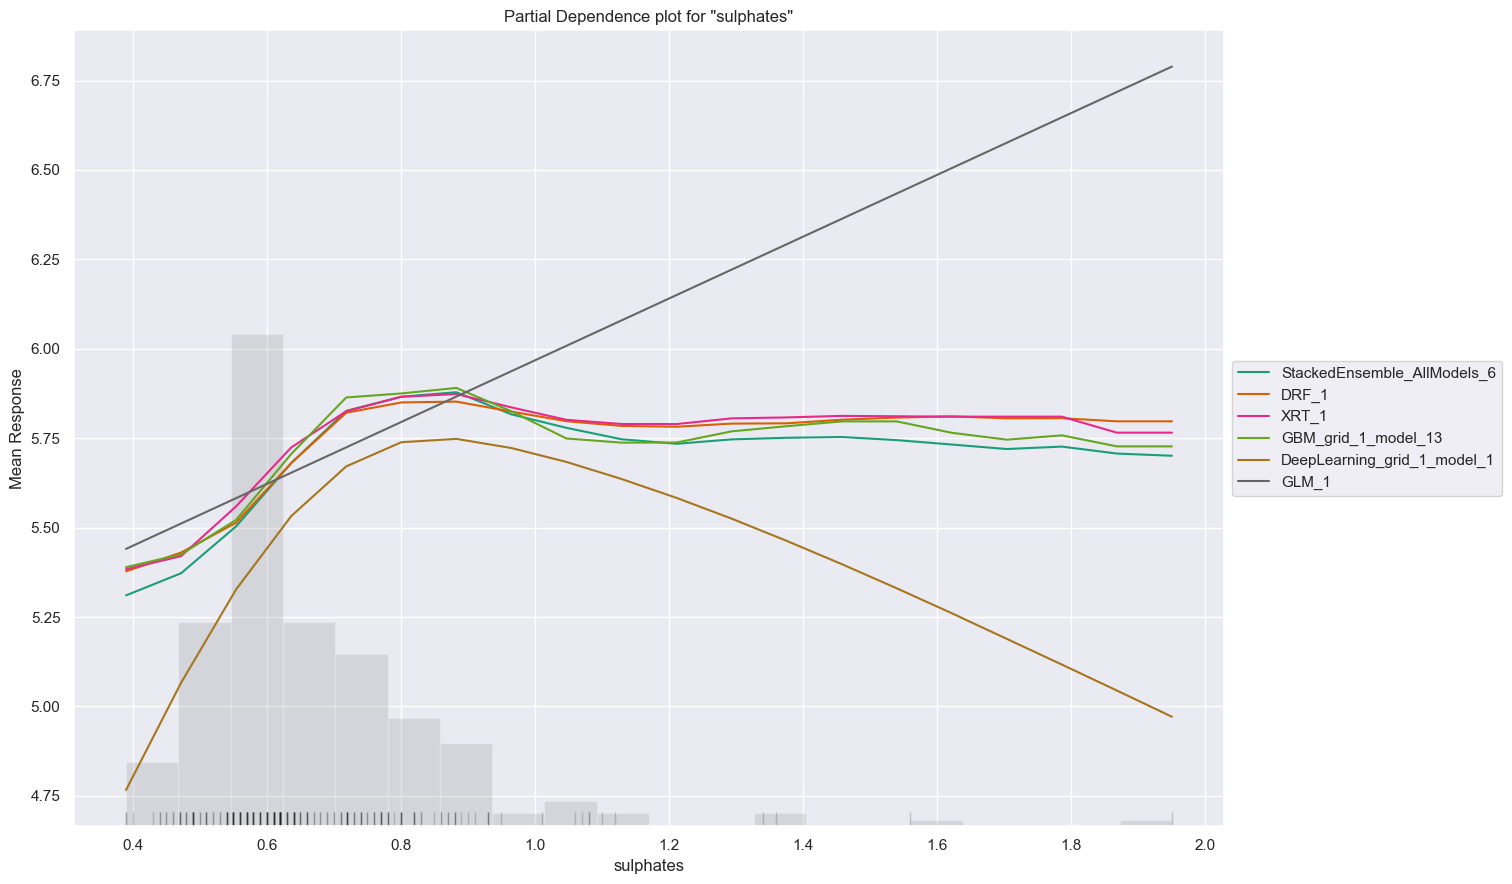

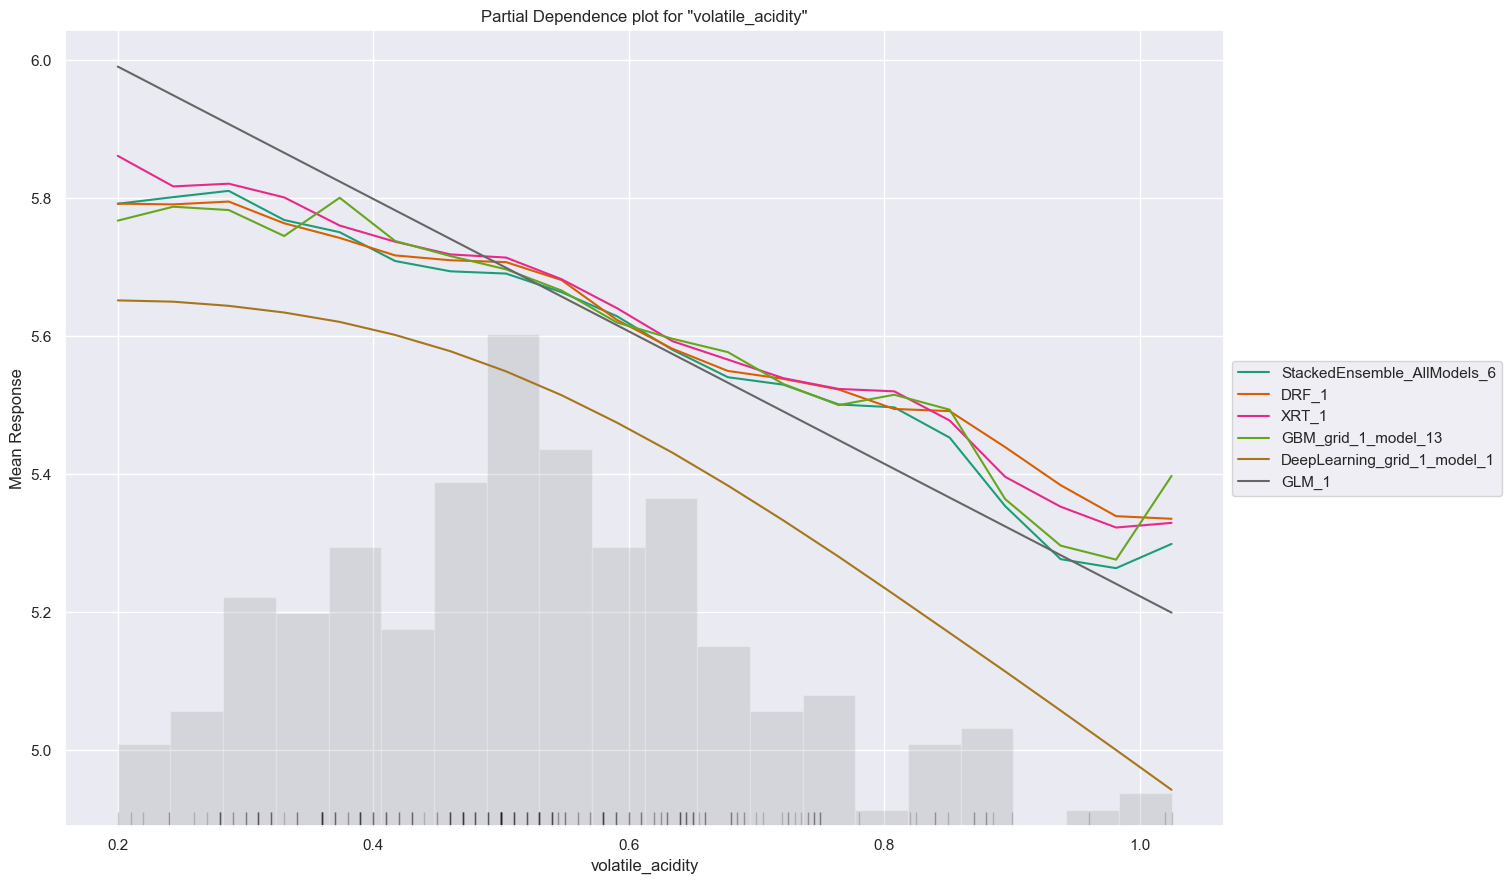

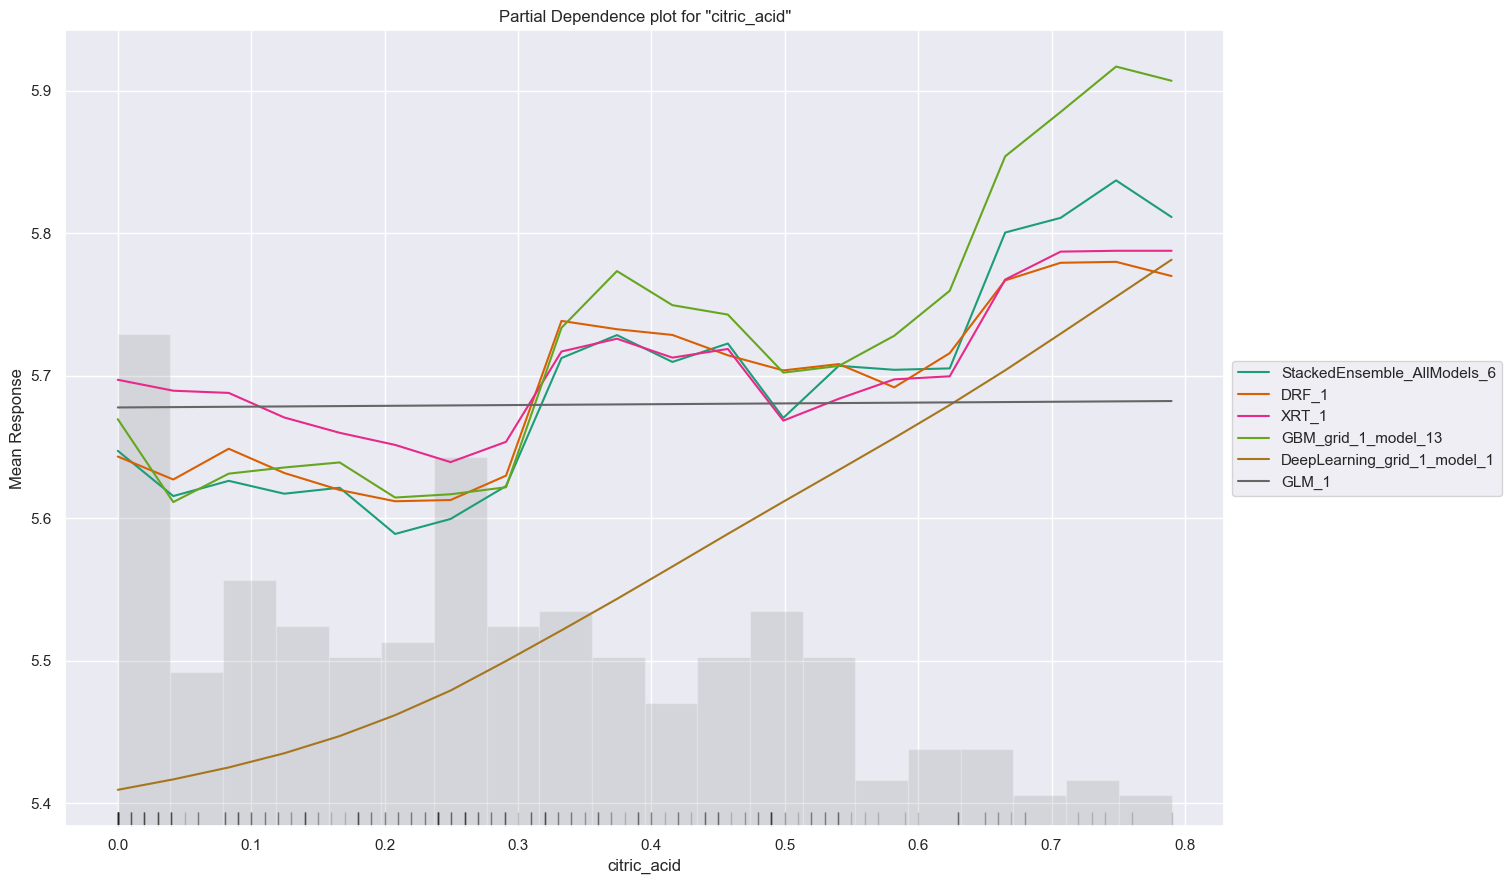

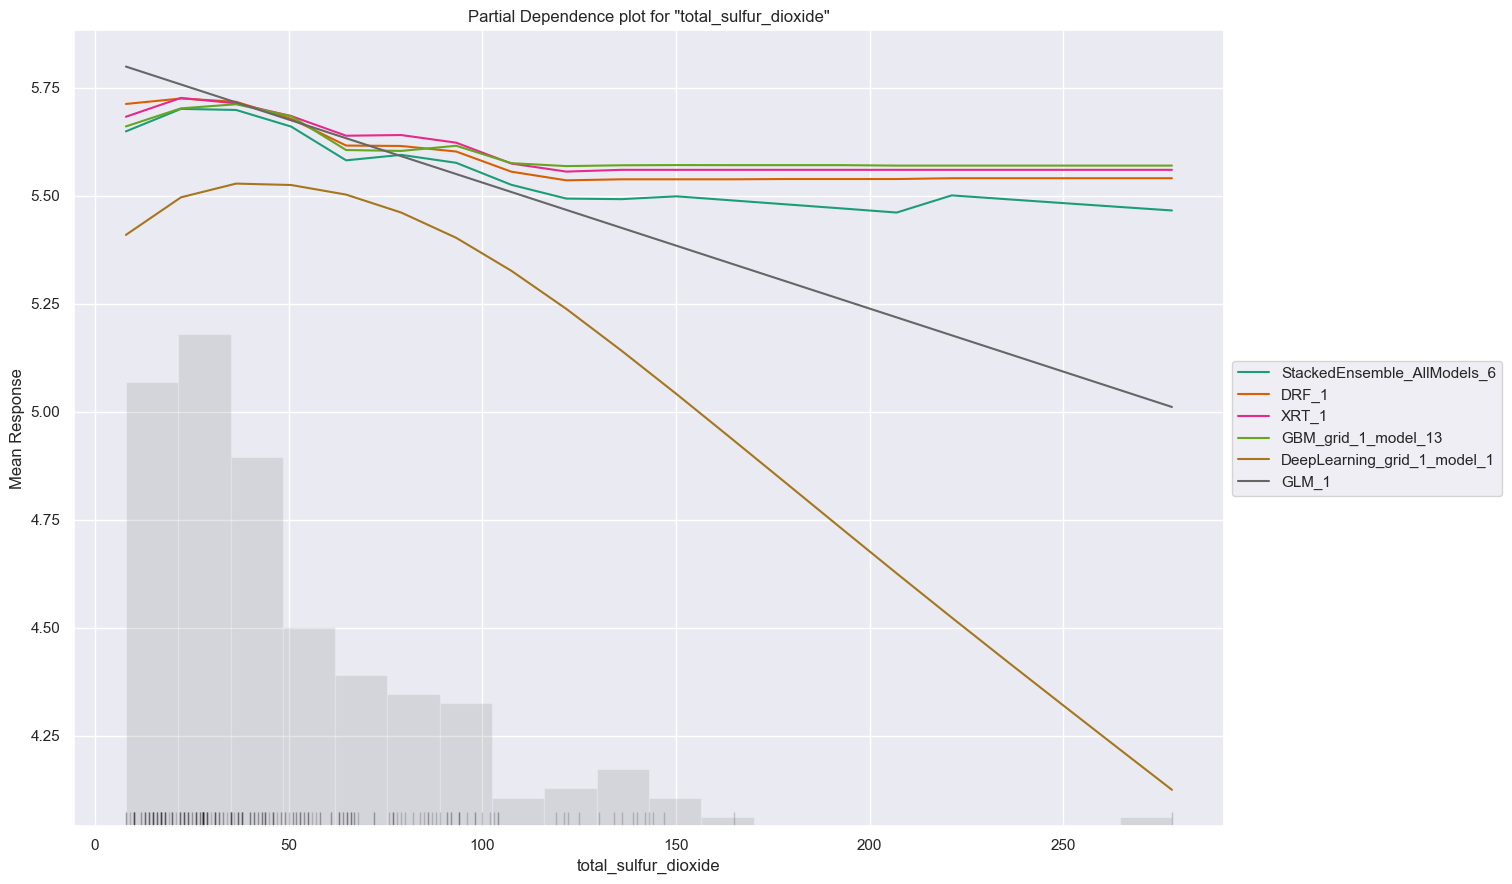

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

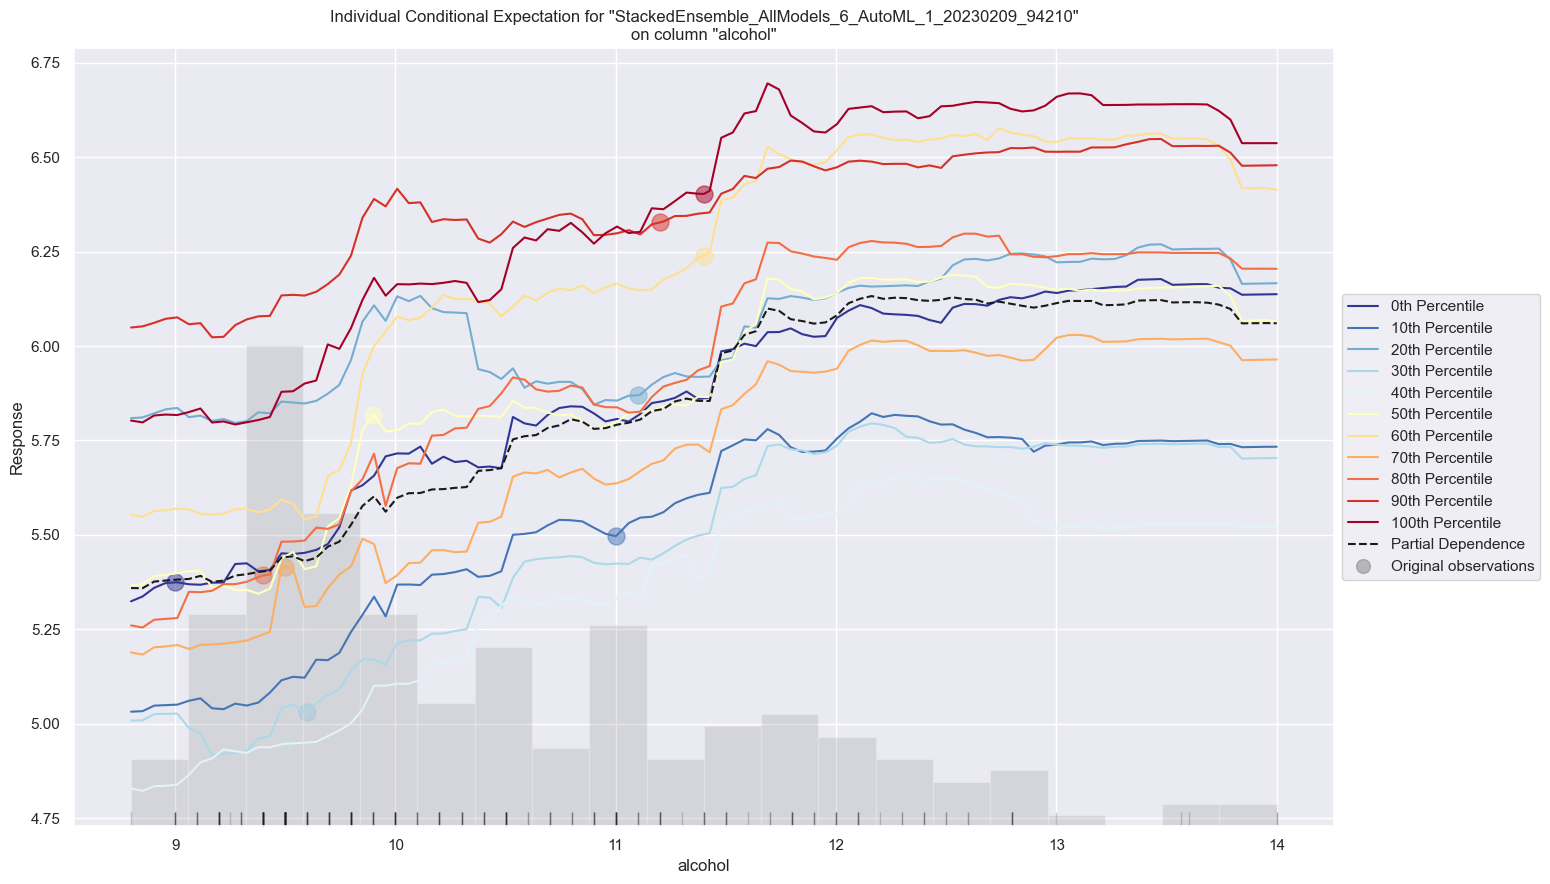

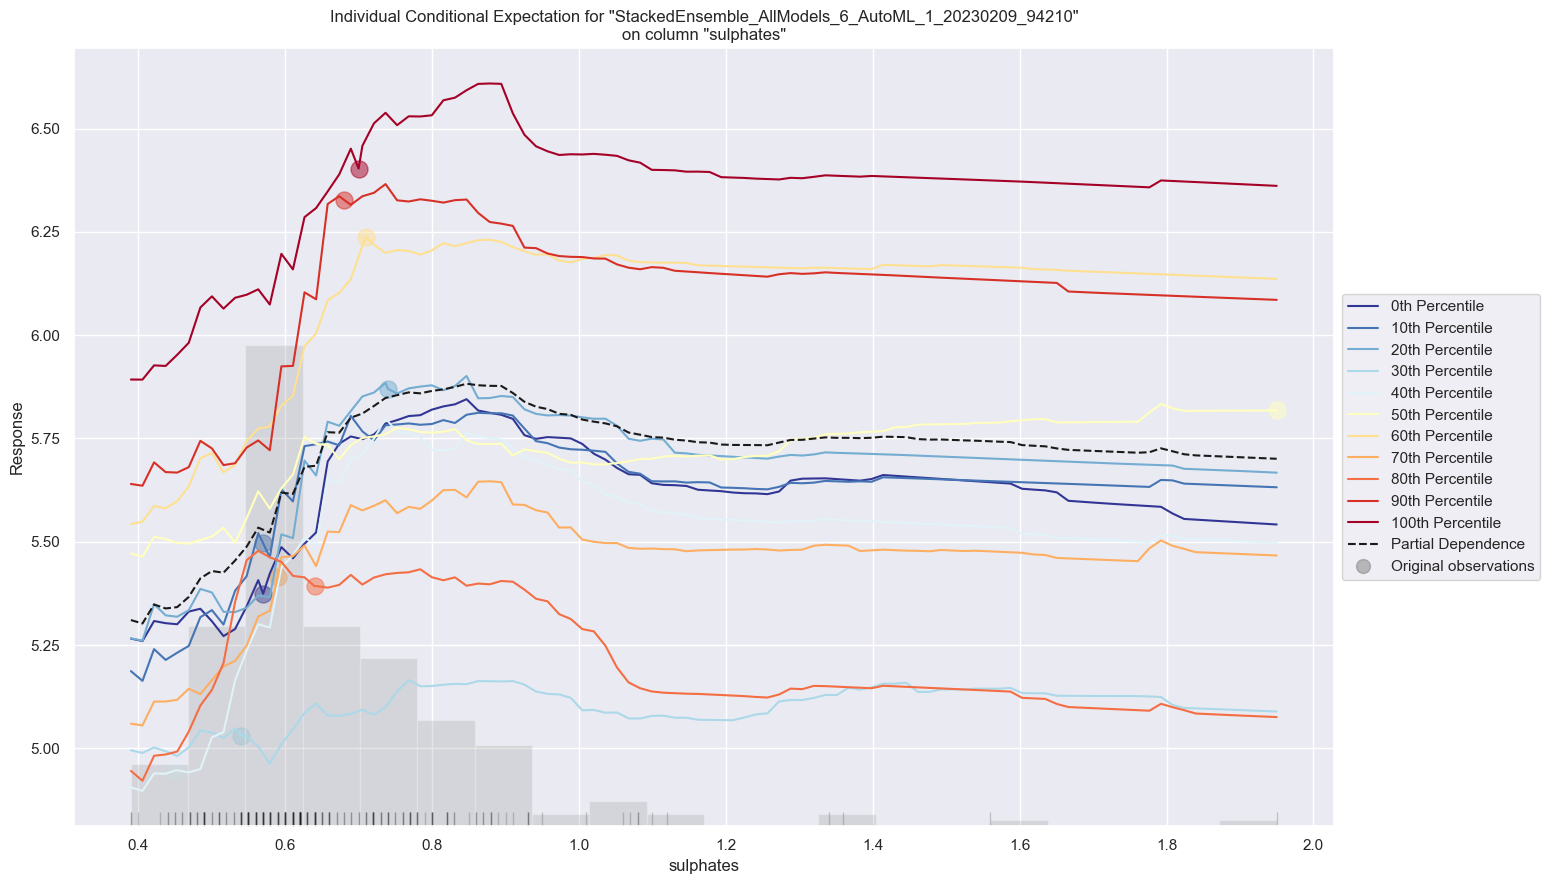

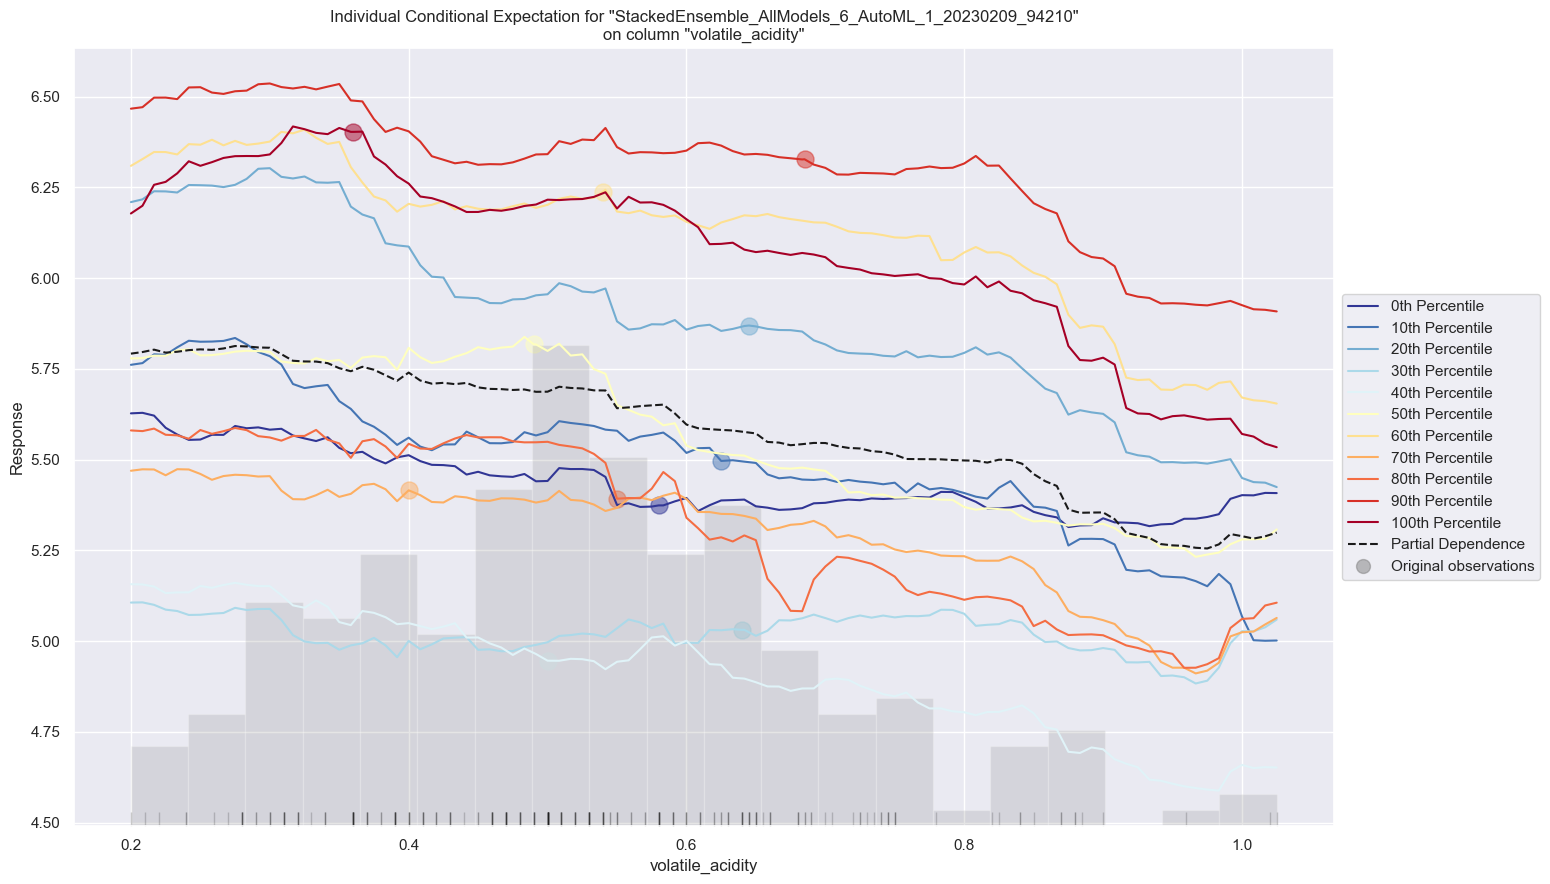

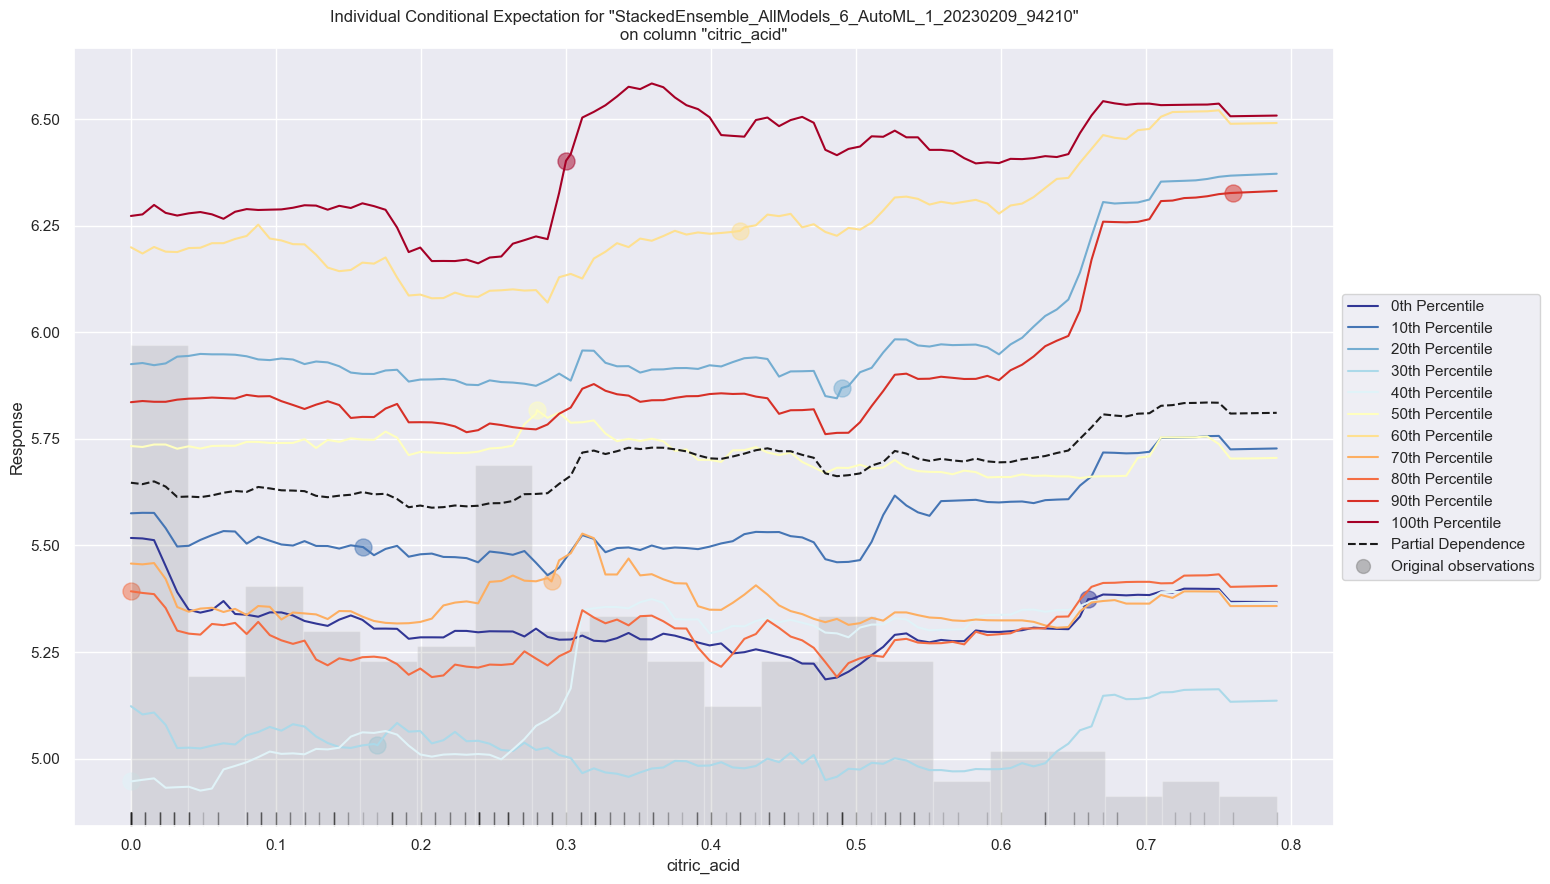

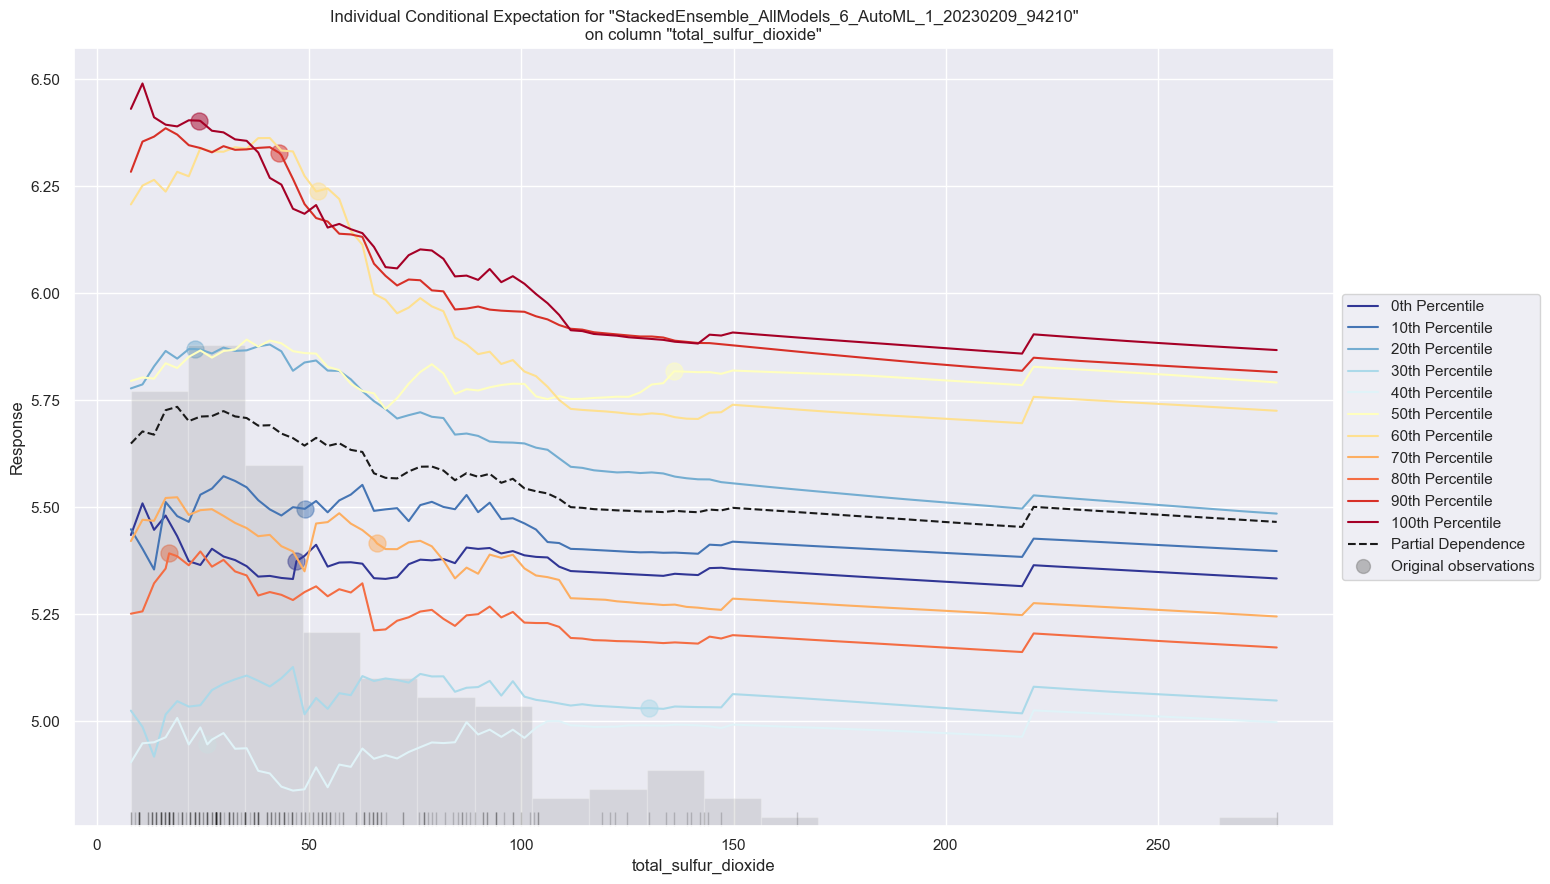

In [47]:
exa = aml.explain(df_test)

# Residual Analysis

Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# SHAP Summary

SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots
Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation
An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [48]:
import statsmodels.formula.api as smf  # OLS model Library

In [49]:
import h2o

pandas_df = h2o.as_list(df)

In [50]:
results = smf.ols(
    "quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide +density + pH + sulphates + alcohol + Id",
    data=pandas_df,
).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     56.45
Date:                Thu, 09 Feb 2023   Prob (F-statistic):          2.11e-106
Time:                        09:47:17   Log-Likelihood:                -1106.2
No. Observations:                1143   AIC:                             2238.
Df Residuals:                    1130   BIC:                             2304.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               23.0310     24.818      0.928      0.354     -25.664      71.726
fixed_acidity            0.0188      0.031      0.616      0.538      -0.041       0.079
volatile_acidity        -1.1254      0.141     -7.994      0.000      -1.402      -0.849
citric_acid             -0.1221      0.173     -0.704      0.481      -0.462       0.218
residual_sugar           0.0140      0.018      0.758      0.448      -0.022       0.050
chlorides               -1.7206      0.498     -3.458      0.001      -2.697      -0.744
free_sulfur_dioxide      0.0029      0.003      1.109      0.268      -0.002       0.008
total_sulfur_dioxide    -0.0030      0.001     -3.458      0.001      -0.005      -0.001
density                -18.8049     25.323     -0.743      0.458     -68.491      30.881
pH                      -0.4342      0.224     -1.935      0.053      -0.875       0.006
sulphates                0.8643      0.134      6.452      0.000       0.601       1.127
alcohol                  0.2830      0.031      9.016      0.000       0.221       0.345
Id                   -4.528e-05   4.58e-05     -0.990      0.323      -0.000    4.45e-05
==============================================================================
Omnibus:                       18.742   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.421
Skew:                          -0.143   Prob(JB):                     6.74e-07
Kurtosis:                       3.717   Cond. No.                     1.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Hyperparameter Tuning - Random Grid Search on GBM Model

In [51]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [52]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [53]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [54]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [55]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
      col_sample_rate  learn_rate  max_depth  sample_rate           model_ids  \
0                 0.3        0.03        8.0          1.0   gbm_grid2_model_5   
1                 0.7        0.03        6.0          1.0   gbm_grid2_model_6   
2                 0.9        0.03       10.0          0.5  gbm_grid2_model_21   
3                 0.8        0.03        9.0          0.9   gbm_grid2_model_8   
4                 0.7        0.06        5.0          0.6  gbm_grid2_model_14   
5                 0.9        0.10        4.0          0.7  gbm_grid2_model_15   
6                 0.1        0.06        8.0          0.9  gbm_grid2_model_34   
7                 0.5        0.10        9.0          1.0   gbm_grid2_model_7   
8                 0.9        0.04        4.0          0.9  gbm_grid2_model_31   
9                 0.5        0.05        7.0          0.9   gbm_grid2_model_2   
10            

In [56]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [57]:
gbm_gridperf2

      col_sample_rate  learn_rate  max_depth  sample_rate           model_ids  \
0                 0.3        0.03        8.0          1.0   gbm_grid2_model_5   
1                 0.7        0.03        6.0          1.0   gbm_grid2_model_6   
2                 0.9        0.03       10.0          0.5  gbm_grid2_model_21   
3                 0.8        0.03        9.0          0.9   gbm_grid2_model_8   
4                 0.7        0.06        5.0          0.6  gbm_grid2_model_14   
5                 0.9        0.10        4.0          0.7  gbm_grid2_model_15   
6                 0.1        0.06        8.0          0.9  gbm_grid2_model_34   
7                 0.5        0.10        9.0          1.0   gbm_grid2_model_7   
8                 0.9        0.04        4.0          0.9  gbm_grid2_model_31   
9                 0.5        0.05        7.0          0.9   gbm_grid2_model_2   
10                0.2        0.04        5.0          0.9  gbm_grid2_model_29   
11                0.9       

In [58]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [59]:
models = gbm_gridperf2.models

In [60]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [61]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [62]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [63]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.3        0.03          8          1.0           0.354805
1               0.7        0.03          6          1.0           0.360112
2               0.9        0.03         10          0.5           0.362631
3               0.8        0.03          9          0.9           0.364345
4               0.7        0.06          5          0.6           0.367497
5               0.9        0.10          4          0.7           0.368361
6               0.1        0.06          8          0.9           0.372489
7               0.5        0.10          9          1.0           0.374283
8               0.9        0.04          4          0.9           0.374335
9               0.5        0.05          7          0.9           0.374353
10              0.2        0.04          5          0.9           0.375424
11              0.9        0.09          8          0.9           0.375609
12              0.8      

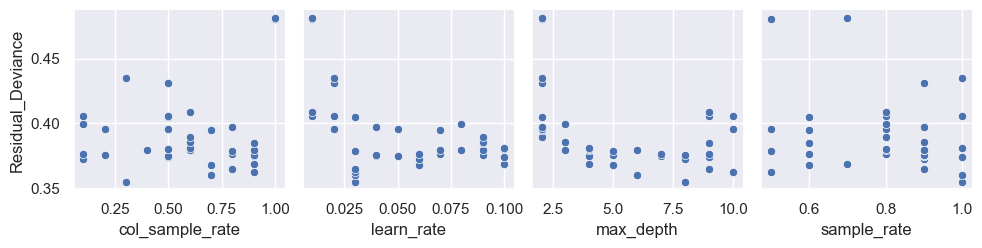

In [64]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

# Hyperparameter Tuning Analysis

From the above chart, we can conclude that hyperparameters like - learn rate, max_depth are having significant effect on our residual deviance, more the learn rate and max_depth, less is the residual deviance.

Conclusion 
- Built a predictive model using H2O AutoML to predict the quality of wine using certain attributes.                                                  
- Studied the effects of Ridge and LASSO regularization on the GLM Model.
- Studied the importance of variable using SHAP summary.
- Performed the hyperparameterb tuning using Random Grid Search Method. 

References
- https://rstudio-pubs-static.s3.amazonaws.com/64286_2635bf8b05fb4423ac2968243211b46b.html
- https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
- https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

MIT License

Copyright (c) 2022 Karan Raman Agrawal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.